<a href="https://colab.research.google.com/github/RobertSloan22/AppliedDataScience/blob/main/Capstone_Facial_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**
ROBERT A, SLOAN

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


PROBLEM STATEMENT:

CONTEXT: Computer Vision has use cases across almost all domains, from self-driving and evaluating the driver's experience in more automated and self-driving vehicles to the customer service industry across many types of jobs. The objective here is to build a range of different CNNs and test them to see what architecture works best for the problem of taking in an image and being able to recognize that A) there is a person in the image, but then also determine the emotional state of the person in the image.

Key Questions:

CNNs: Are they the right type of model for this task?

If CNNs are the right type of model, how are they constructed, and what kind of depth to the convolution layers is necessary and useful?

What is the best level of accuracy and overall performance that we can achieve before the model starts to become overfitted?

Transfer learning: How much can be gained by using pretrained models that are open-sourced? These models have been trained at no small expense on a large amount of labeled data that's time-intensive to collect and label. To reproduce them would be outside of what we are currently able to afford for the task, so can we gain from the hard work done by others, and if so, to what level?

We are trying to take in pixels from an image, value the pixel intensity, and then construct a neural network that can learn to see the world in terms of pixel values but be able to recognize the emergent features beyond that of just the pixel value. To see the human face and identify that one face has ears, and where there are ears, there is probably a face when looking at other images. Building on that to recognize the mouth and the facial features that change during different emotional states.





# To accomplish this task we need the proper resources. NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2   

In [70]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Feb 22 18:20:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0              28W /  70W |  14077MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install tensorflow
!pip install keras-tuner
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.3 MB/s eta 0:00:00


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
import tensorflow as tf

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import PIL
# Library for creating data paths
import os
from IPython.display import HTML
# Library for randomly selecting data points
import random
# Library for creating and showing plots
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax, AdamW
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


# Import the Facial_emotion_images data set from google drive as a zip file and extract contents into the colab workspace

In [ ]:
path = '/content/drive/My Drive/Deep learning/CapstoneProject/Facial_emotion_images.zip'

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

### **Let us load and unzip the data**

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

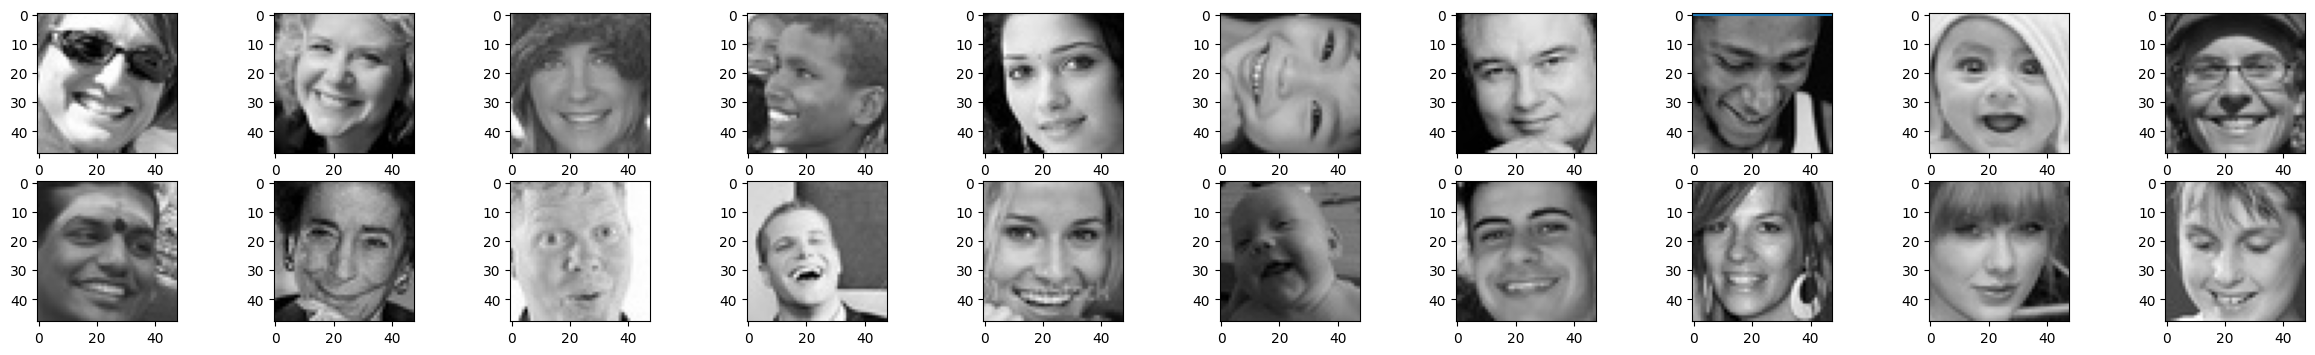

In [ ]:
folder_path = 'Facial_emotion_images/'
num_happy = len(os.listdir(folder_path + "train/" + 'happy'))

# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 25px; padding: 10px; border-radius: 10px;'>" \
              f"<h3 style='color: #333;'>Training Data Information:</h3>" \
              f"<p style='color: blue;'>Number of training images for class <b>'happy'</b> is: <b>{num_happy}</b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))


expression1 = 'happy'
plt.figure(figsize= (30,4))
for i in range(1, 21, 1):
    plt.subplot(2, 10, i)
    img = load_img(folder_path + "train/" + expression1 + "/" +
                  os.listdir(folder_path + "train/" + expression1)[i], target_size = (picture_size, picture_size))
    # Seperate the two expressions with a horizontal line
    if i == 8:
        plt.axhline()
    plt.imshow(img)


**Observations and Insights:__**

### **Surprised**

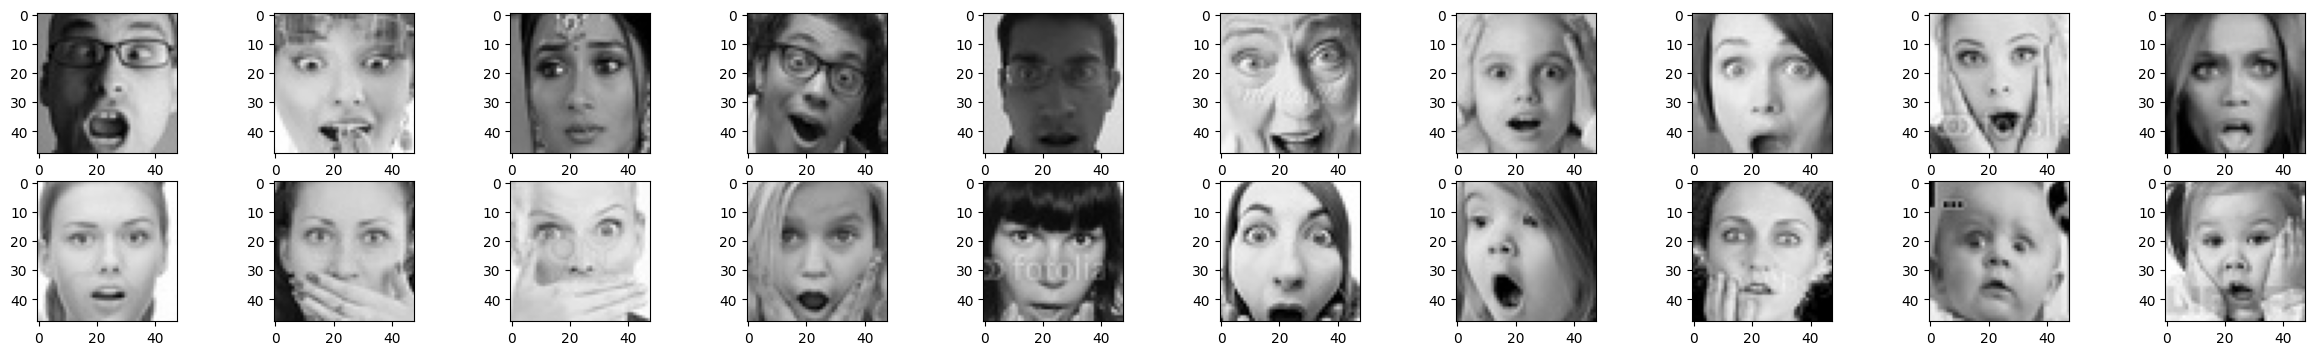

In [ ]:
folder_path = 'Facial_emotion_images/'
num_surprise = len(os.listdir(folder_path + "train/" + 'surprise'))
num_happy= len(os.listdir(folder_path + "train/" + 'happy'))
num_neutral = len(os.listdir(folder_path + "train/" + 'neutral'))
num_sad = len(os.listdir(folder_path + "train/" + 'sad'))

# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; padding: 10px;text-align: center; font-size: 25px; border-radius: 10px;'>" \
              f"<h3 style='color: #333;'>Training Data Information:</h3>" \
              f"<p style='color: blue;'>Number of training images for class <b>'surprise'</b> is: <b>{num_surprise}</b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))
expression = 'surprise'

plt.figure(figsize= (30
                     ,4))
for i in range(1, 21, 1):
    plt.subplot(2, 10, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Sad**

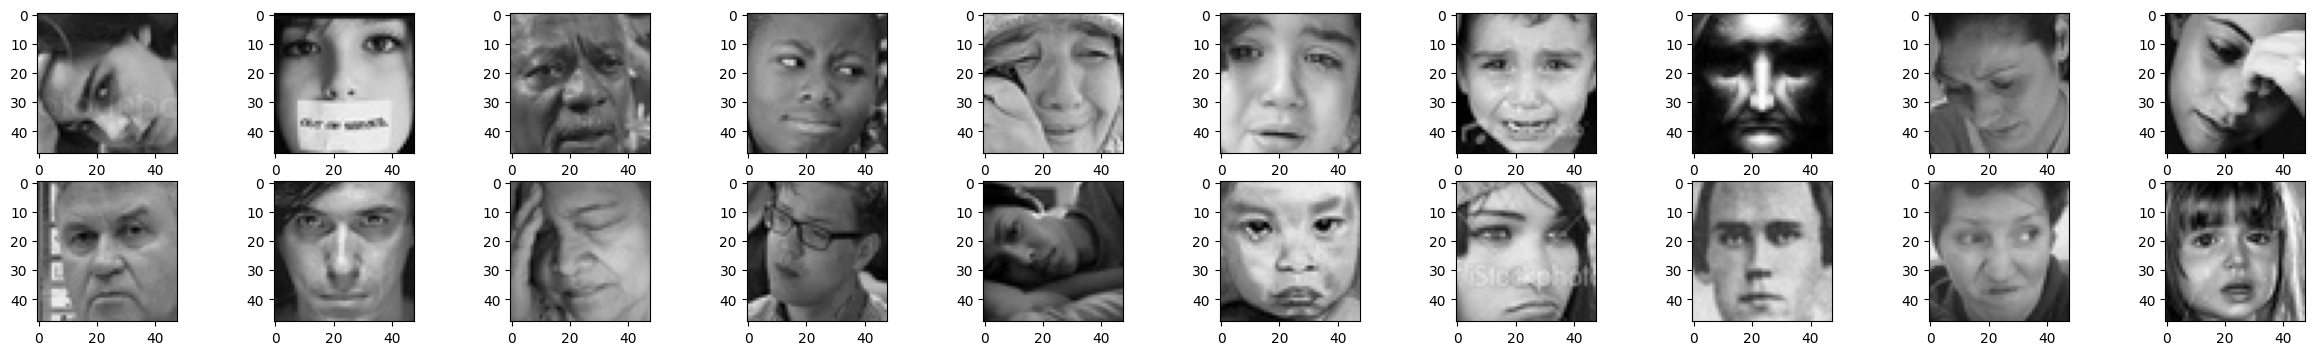

In [ ]:
from IPython.display import HTML
import os

folder_path = 'Facial_emotion_images/'
num_sad = len(os.listdir(folder_path + "train/" + 'sad'))

# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 25px; padding: 10px; border-radius: 10px;'>" \
              f"<h3 style='color: #333;'>Training Data Information:</h3>" \
              f"<p style='color: blue;'>Number of training images for class <b>'sad'</b> is: <b>{num_sad}</b></p>" \
              f"</div>"

display(HTML(output_html))
expression = 'sad'

plt.figure(figsize= (30,4))
for i in range(1, 21, 1):
    plt.subplot(2, 10, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Neutral**

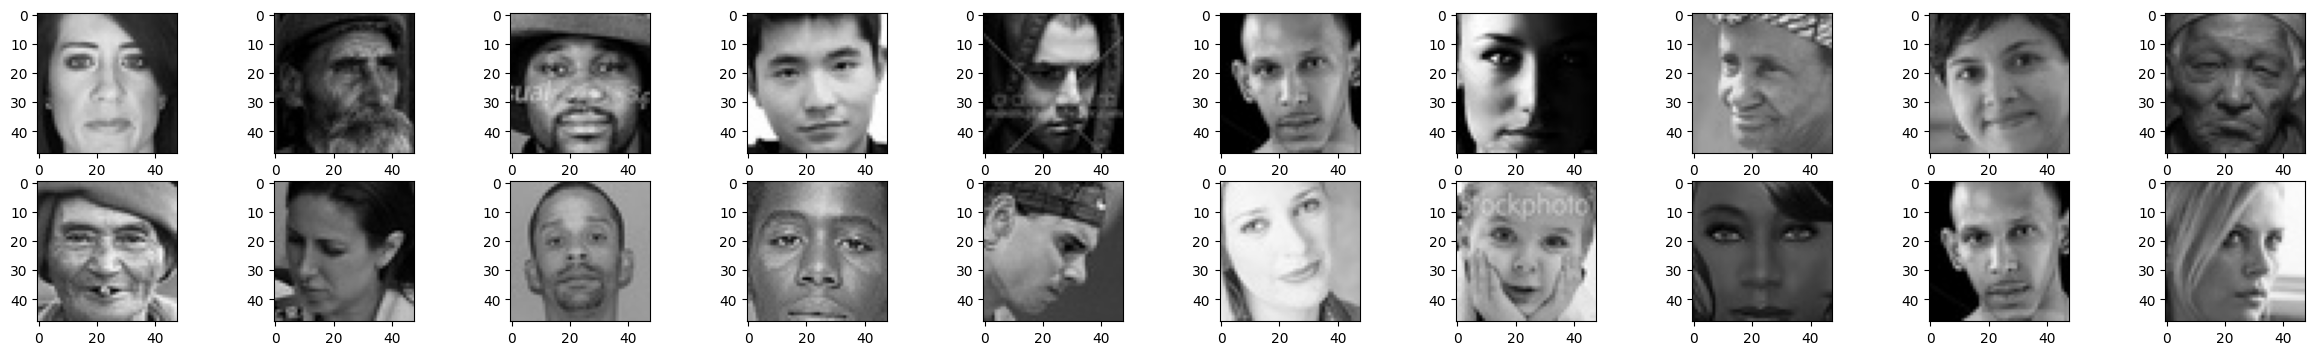

In [ ]:
folder_path = 'Facial_emotion_images/'
num_neutral = len(os.listdir(folder_path + "train/" + 'neutral'))

# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 25px; padding: 10px; border-radius: 10px;'>" \
              f"<h3 style='color: #333;'>Training Data Information:</h3>" \
              f"<p style='color: blue;'>Number of training images for class <b>'neutral'</b> is: <b>{num_neutral}</b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))
expression = 'neutral'

plt.figure(figsize= (30,4))
for i in range(1, 21, 1):
    plt.subplot(2, 10, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

## **Checking Distribution of Classes**

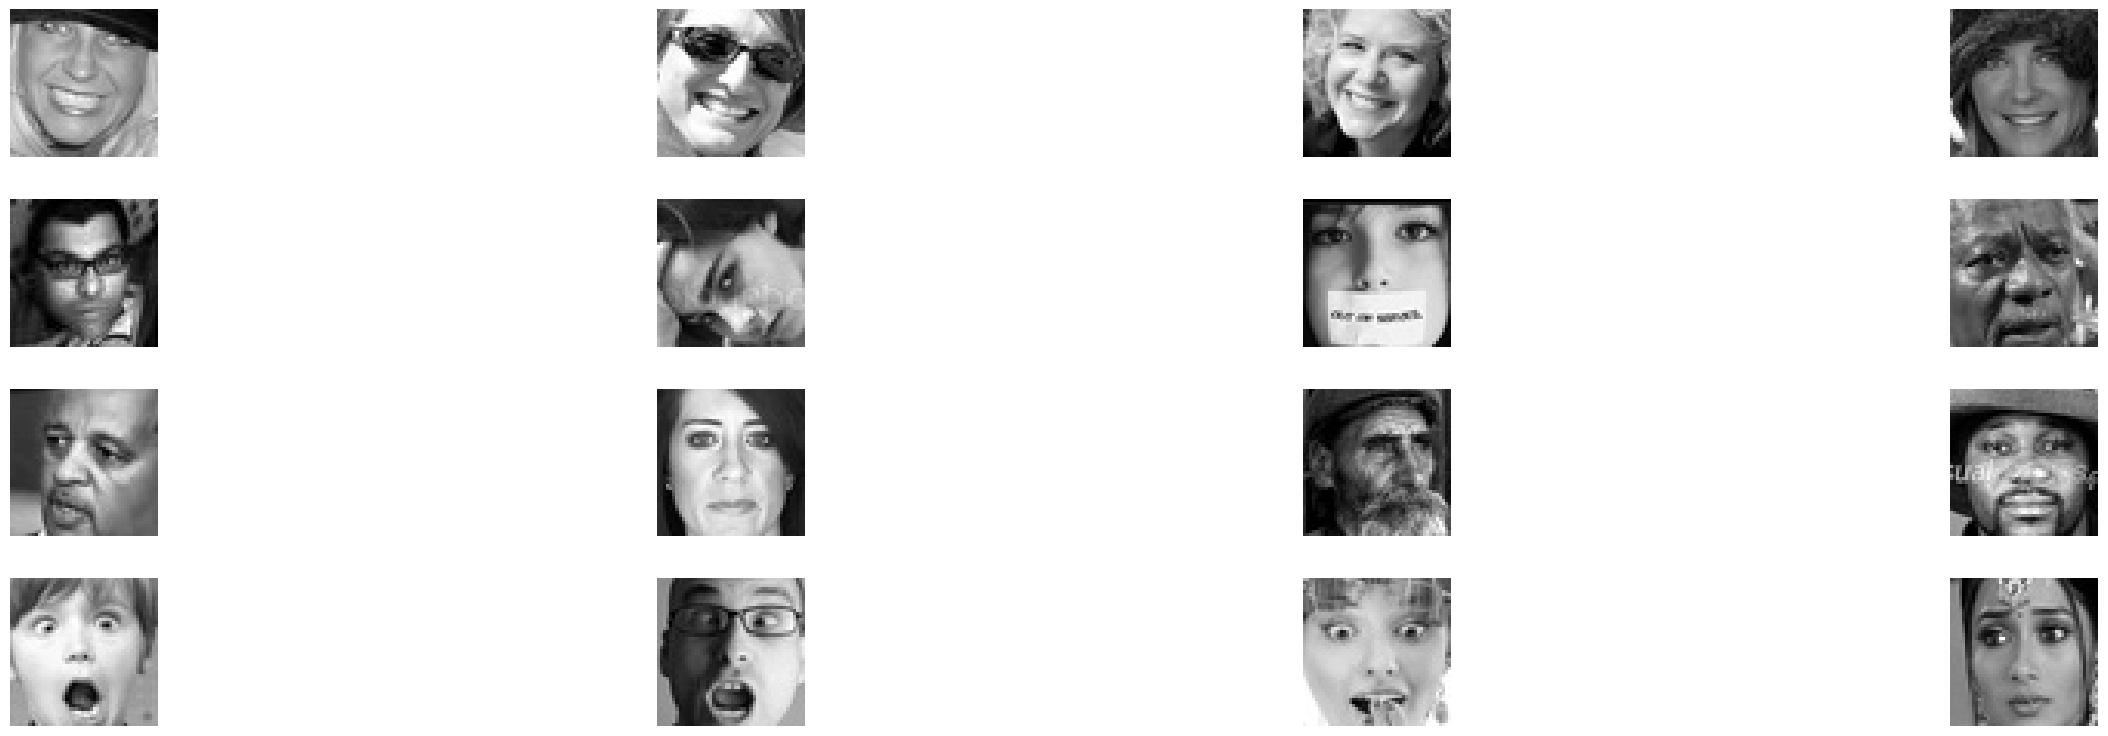

In [ ]:
import os
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Assuming 'base_dir' is correctly set to your dataset directory
base_dir = 'Facial_emotion_images/train/'
categories = ['happy', 'sad', 'neutral', 'surprise']

fig, ax = plt.subplots(nrows=len(categories), ncols=4, figsize=(30, 8))  # Adjusted figsize for better visibility

for i, category in enumerate(categories):
    category_dir = os.path.join(base_dir, category)
    sample_images = os.listdir(category_dir)[:4]  # Get first 4 images of each category
    for j, image in enumerate(sample_images):
        img_path = os.path.join(category_dir, image)
        img = load_img(img_path, target_size=(48, 48), color_mode='grayscale')
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].axis('off')
        if j == 0:  # Mark the category name more prominently
            ax[i, j].set_ylabel(category.capitalize(), fontsize=14, labelpad=10, color='blue')

# Enhance layout and visibility
plt.tight_layout(pad=3.0)
plt.show()


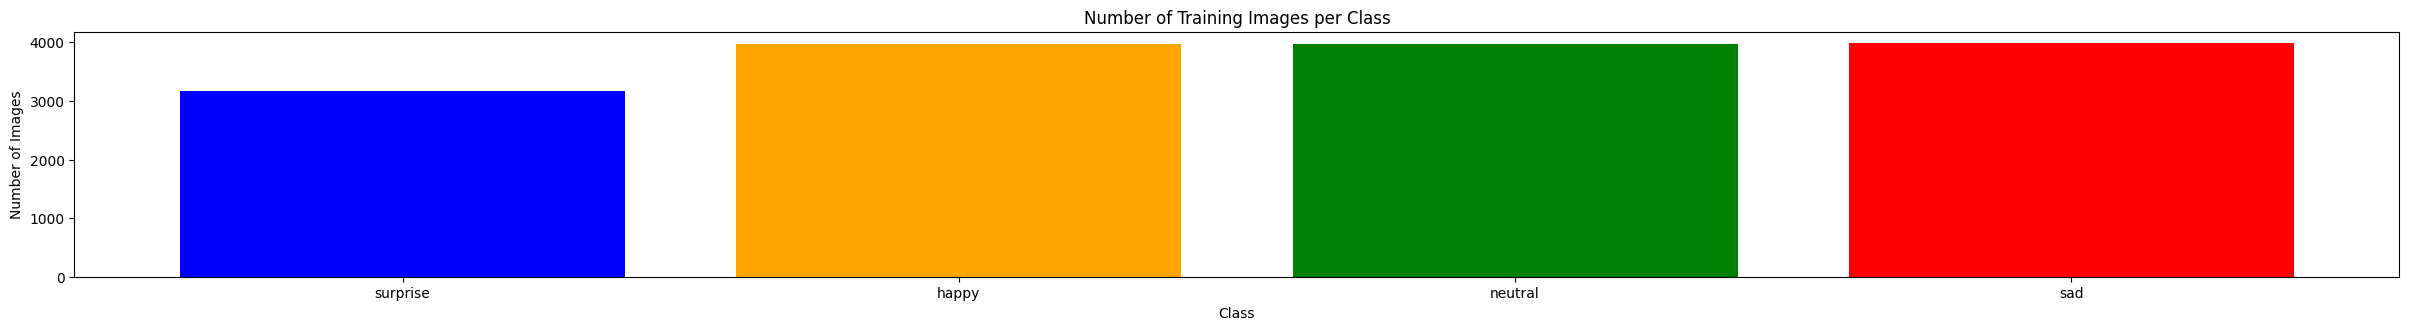

In [ ]:
folder_path = 'Facial_emotion_images/'
num_surprise = len(os.listdir(folder_path + "train/" + 'surprise'))
num_happy= len(os.listdir(folder_path + "train/" + 'happy'))
num_neutral = len(os.listdir(folder_path + "train/" + 'neutral'))
num_sad = len(os.listdir(folder_path + "train/" + 'sad'))

# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; padding: 10px;text-align: center; font-size: 25px; border-radius: 10px;'>" \
              f"<h3 style='color: #333;'>Training Data Information:</h3>" \
              f"<p style='color: blue;'>Number of training images for class <b>'surprise'</b> is: <b>{num_surprise}</b></p>" \
              f"<p style='color: green;'>Number of training images for class <b>'neutral'</b> is: <b>{num_neutral}</b></p>" \
              f"<p style='color: orange;'>Number of training images for class <b>'happy'</b> is: <b>{num_happy}</b></p>" \
              f"<p style='color: red;'>Number of training images for class <b>'sad'</b> is: <b>{num_sad}</b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))
# Code to plot histogram
plt.figure(figsize = (30, 7))


# Data
classes = ['surprise', 'happy', 'neutral', 'sad']
num_images = [3173, 3976, 3978, 3982]

%matplotlib inline

plt.subplot(2, 1, 1),

plt.bar(classes, num_images, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Training Images per Class')
plt.show()

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

OBSERVATION: The categorys sad neutral and happy all have the same ammount of images however the suprise category has less.


**Observations and Insights:__**

The data set is skewed and needs to have some data augmentation methods applied to equalize the data set.

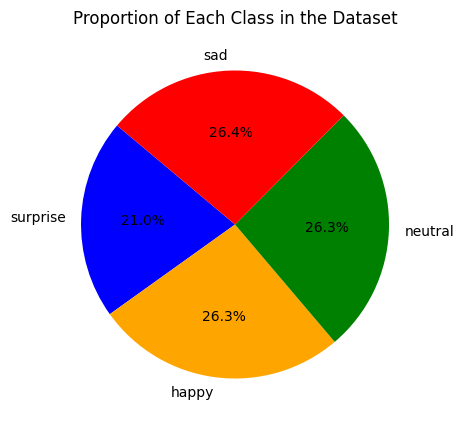

In [ ]:
classes = ['surprise', 'happy', 'neutral', 'sad']
num_images = [3173, 3976, 3978, 3982]
plt.figure(figsize=(5, 5))

plt.pie(num_images, labels=classes, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red'])
plt.title('Proportion of Each Class in the Dataset')
plt.show()
# Check the Data Set for imbalance
min_class_size = min(num_images)
max_class_size = max(num_images)
imbalance_ratio = max_class_size / min_class_size

import matplotlib.pyplot as plt

# Data
classes = ['surprise', 'happy', 'neutral', 'sad']
num_images = [3173, 3976, 3978, 3982]

%matplotlib inline


# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 25px; padding: 10px; border-radius: 10px;'>" \
              f"<h3 style='color: red'>Imbalance Ratio: Categorical representation in the data set (Max Class Size / Min Class Size): 1.25 :</h3>" \
              f"<p style='color: #666;'><b>''</b>Imbalance Ratio between classes is:  <b>{imbalance_ratio:.2f}</b></p>" \
              f"<p style='color: red;'><b>''</b> Sad image representation is: <b> 26.4% </b></p>" \
              f"<p style='color: green;'><b>''</b>Neutral image representation is: <b> 26.3% </b></p>" \
              f"<p style='color: orange;'><b>''</b> Happy image representation is: <b> 26.3% </b></p>" \
              f"<p style='color: blue;'><b>''</b>Surprise image representation is: <b> 21.0% </b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))


In the initial EDA of the dataset, the categories of emotions appeared to be balanced except for 'surprise'. Digging into the statistical significance of the disparity, I have concluded the following

An imbalance ratio of 1.25 (Max Class Size / Min Class Size) suggests a relatively mild imbalance among the classes in the dataset.

**Impact of Mild Imbalance**
Model Performance: **Model Performance** Modern neural networks, particularly those used for image classification tasks (like CNNs), are quite robust to mild class imbalances. An imbalance ratio close to 1 indicates that the classes are fairly well represented.

**Learning Dynamics**: The slight imbalance might not significantly skew the learning process, meaning the model can still learn to generalize well across all classes without heavy reliance on data balancing techniques.

To make sure that the mild inbalance is not going to impact the training process the following steps have been employed in the following models traing.
** Monitor Class-specific Metrics: **Even with a mild imbalance,** monitoring metrics like precision, recall, and F1-score** for each class is good practice. This ensures that all classes are correctly learned by the model, and no class is systematically favored or ignored.

**Mild Data Augmentation:** While aggressive oversampling or synthetic data generation might not be necessary, employing data augmentation techniques  rotation, flipping, scaling on the training set, can further help handle the slight imbalance's impact.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [90]:
from keras.preprocessing.image import ImageDataGenerator

# Define image size and paths
picture_size = 48
base_path = "Facial_emotion_images/"

train_path = base_path + "train/"
validation_path = base_path + "validation/"
test_path = base_path + "test/"

# Initialize the data generator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)

# For validation and test sets, usually only rescaling is applied
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_val_datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep data in order for evaluation
)

# Getting the total Training images, Testing images and Validation images.
traingen = train_generator.n
testgen = test_generator.n
validationgen = validation_generator.n
# Using inline HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 25px; padding: 10px; border-radius: 10px;'>" \
              f"<p style='color: red;'><b>''</b>Total Training Images <b> {traingen}</b></p>" \
              f"<p style='color: black;'><b>''</b>Total Testing Images <b> {validationgen} </b></p>" \
              f"<p style='color: blue;'><b>'Data Set'</b>Total Validation Images <b>{testgen} </b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))

# Functions for Classification_Report, Confusion_Matrix, Performance, Accuracy, Loss Plotting Functions


In [ ]:
#Defining the function for creating the custom classification report


def metrics_score(actual, predicted):

    from sklearn.metrics import classification_report

    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_model_performance_and_confusion_matrix(model, history, test_generator, metrics_function=None):
    # Plot training and validation accuracy
    plt.figure(figsize=(25, 5))
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    # Predict labels for the test set
    predicted_labels = np.argmax(model.predict(test_generator), axis=1)

    # Get the true labels for the test set
    true_labels = test_generator.classes

    # Optionally print class names
    class_names_list = list(test_generator.class_indices.keys())
    print("Class names in the dataset:", class_names_list)

    # Optionally calculate and display metrics
    if metrics_function is not None:
        metrics_function(true_labels, predicted_labels)

    # Plot the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names_list, yticklabels=class_names_list)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_model_stats(model, history, test_generator, model_name):
    # Compute confusion matrix
    cm = confusion_matrix(test_generator.classes, np.argmax(model.predict(test_generator), axis=1))

    # Plot the training and validation accuracy values
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot the training and validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot confusion matrix
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.tight_layout()  # Adjust layout to not overlap figures
    plt.show()


In [75]:
def metrics_score(actual, predicted):

    from sklearn.metrics import classification_report

    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()


# Total Images in the categories and creating a weighted ouput for each emotion

In [ ]:
import os
from IPython.display import HTML, display

base_path = "Facial_emotion_images/"
subsets = ['train', 'test', 'validation']
classes = ['happy', 'sad', 'neutral', 'surprise']

subset_counts = {subset: 0 for subset in subsets}

for subset in subsets:
    for emotion in classes:
        # Dir construction
        dir_path = os.path.join(base_path, subset, emotion)
        # Count files in directories and add to subset count
        if os.path.exists(dir_path):
            files_count = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])
            subset_counts[subset] += files_count

output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 30px; padding: 10px; border-radius: 10px;'>" \
              f"<p style='color: red;'><b>Total Training Images:</b> {subset_counts['train']}</p>" \
              f"<p style='color: black;'><b>Total Testing Images:</b> {subset_counts['test']} </p>" \
              f"<p style='color: blue;'><b>Total Validation Images:</b> {subset_counts['validation']} </p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))


In [ ]:
import os
from IPython.display import HTML, display

base_path = "Facial_emotion_images/"
subsets = ['train', 'test', 'validation']
classes = ['happy', 'sad', 'neutral', 'surprise']

class_counts = {emotion: 0 for emotion in classes}

for subset in subsets:
    for emotion in classes:
        dir_path = os.path.join(base_path, subset, emotion)
        if os.path.exists(dir_path):
            class_counts[emotion] += len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])

# Generate HTML content
output_html = "<div style='background-color: #f0f0f5; text-align: center; font-size: 30px; padding: 20px; border-radius: 10px;'>"
output_html += "<h3 style='color: #333;'>Class Distribution</h3>"
for emotion, count in class_counts.items():
    output_html += f"<p style='color: #333;'><b>{emotion.capitalize()}:</b> {count}</p>"
output_html += "</div>"

# Display the styled output
display(HTML(output_html))


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from IPython.display import HTML, display


total_samples = sum(class_counts.values())
n_classes = len(classes)

# Compute class weights using sklearn's compute_class_weight function for better accuracy

y_integers = np.array([classes.index(emotion) for emotion in class_counts.keys() for _ in range(class_counts[emotion])])
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
class_weights_dict = {classes[i]: weight for i, weight in enumerate(class_weights)}
# List the class weights in styled HTML
output_html = "<div style='background-color: #f0f0f5; text-align: center; font-size: 30px; padding: 20px; border-radius: 10px;'>"
output_html += "<h3 style='color: #333;'>Computed Class Weights</h3>"
for emotion, weight in class_weights_dict.items():
    output_html += f"<p style='color: #333;'><b>{emotion.capitalize()}:</b> {weight:.2f}</p>"
output_html += "</div>"

# Display the styled output
display(HTML(output_html))


# Creating a weighted class call back for use during training to attempt to off set the class distribution dispairity

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_labels = np.array([classes.index(cls) for cls in classes for _ in range(class_counts[cls])])
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(class_labels), y=class_labels)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}


In [249]:
class_labels = np.array([classes.index(cls) for cls in classes for _ in range(class_counts[cls])])
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(class_labels), y=class_labels)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

class_weights_dict = {classes[i]: weight for i, weight in enumerate(class_weights)}


In [250]:

print("Class labels:", class_labels)
print("Class weights dictionary:", class_weights_dict)
print("Class weights:", class_weights)

# Adjust class weights to sum to 1
total_weight = sum(class_weights)
class_weights_adjusted = {cls: weight / total_weight for cls, weight in class_weights_dict.items()}
print("Class weights adjusted:", class_weights_adjusted)


Class labels: [0 0 0 ... 3 3 3]
Class weights dictionary: {'surprise': 1.262743628185907, 'happy': 0.8663637922166981, 'neutral': 0.96699196326062, 'sad': 0.9806908596933825}
Class weights: [1.26274363 0.86636379 0.96699196 0.98069086]
Class weights adjusted: {'surprise': 0.30973966105899836, 'happy': 0.21251125039569885, 'neutral': 0.23719443619558198, 'sad': 0.24055465234972084}


In [69]:
classes_sorted = sorted(classes)

class_weights_dict = {cls: weight for cls, weight in zip(classes_sorted, class_weights)}


In [ ]:
# Adjusting ClassWeights to ensure proper indicies assignment
class_weights_adjusted = {train_generator.class_indices[cls]: weight for cls, weight in class_weights_dict.items()}


## **Model Building**

### **Creating the Base Neural Network**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

#CNN_MODEL_1

In [ ]:
import tensorflow as tf

In [ ]:
# Fixing the random seed generator to ensure random initilization numbers
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


cnn_model_1 = Sequential([
    # First Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Fourth Convolutional Block
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    GlobalAveragePooling2D(),
    (Flatten()),
    # Dense Layers
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.3),
    # Output
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])

cnn_model_summary = cnn_model_1.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

### **Compiling and Training the Model**

In [71]:
cnn_model_1.compile(optimizer=AdamW(learning_rate=0.0005),  # Adjust learning rate as needed
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='accuracy', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.000002)


In [72]:
history = cnn_model_1.fit(
    train_generator,
    epochs=25,  # Adjust based on early stopping
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights_adjusted

)



Epoch 1/25
473/473 [==============================] - 33s 54ms/step - loss: 1.2893 - accuracy: 0.3542 - val_loss: 1.1666 - val_accuracy: 0.4744 - lr: 5.0000e-04
Epoch 2/25
473/473 [==============================] - 25s 52ms/step - loss: 1.0293 - accuracy: 0.5333 - val_loss: 0.9968 - val_accuracy: 0.5445 - lr: 5.0000e-04
Epoch 3/25
473/473 [==============================] - 25s 53ms/step - loss: 0.8731 - accuracy: 0.6343 - val_loss: 0.8473 - val_accuracy: 0.6383 - lr: 5.0000e-04
Epoch 4/25
473/473 [==============================] - 25s 53ms/step - loss: 0.7914 - accuracy: 0.6766 - val_loss: 0.9087 - val_accuracy: 0.6365 - lr: 5.0000e-04
Epoch 5/25
473/473 [==============================] - 25s 54ms/step - loss: 0.7443 - accuracy: 0.6993 - val_loss: 0.7194 - val_accuracy: 0.7079 - lr: 5.0000e-04
Epoch 6/25
473/473 [==============================] - 25s 54ms/step - loss: 0.7043 - accuracy: 0.7152 - val_loss: 0.7093 - val_accuracy: 0.7229 - lr: 5.0000e-04
Epoch 7/25
473/473 [==============

In [ ]:
history = cnn_model_1.fit(
    train_generator,
    epochs=25,  # Adjust based on early stopping
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights_adjusted

)



Epoch 1/25
473/473 [==============================] - 27s 46ms/step - loss: 1.3672 - accuracy: 0.3026 - val_loss: 1.3214 - val_accuracy: 0.2648 - lr: 5.0000e-04
Epoch 2/25
473/473 [==============================] - 22s 46ms/step - loss: 1.2208 - accuracy: 0.3796 - val_loss: 1.2417 - val_accuracy: 0.3122 - lr: 5.0000e-04
Epoch 3/25
473/473 [==============================] - 22s 45ms/step - loss: 1.1498 - accuracy: 0.4201 - val_loss: 1.2578 - val_accuracy: 0.3255 - lr: 5.0000e-04
Epoch 4/25
473/473 [==============================] - 21s 45ms/step - loss: 1.1108 - accuracy: 0.4621 - val_loss: 1.1026 - val_accuracy: 0.5041 - lr: 5.0000e-04
Epoch 5/25
473/473 [==============================] - 21s 45ms/step - loss: 1.0652 - accuracy: 0.4964 - val_loss: 1.0543 - val_accuracy: 0.5188 - lr: 5.0000e-04
Epoch 6/25
473/473 [==============================] - 21s 45ms/step - loss: 0.9929 - accuracy: 0.5599 - val_loss: 0.9972 - val_accuracy: 0.5821 - lr: 5.0000e-04
Epoch 7/25
473/473 [==============

# Saving the model in .h5 format

In [ ]:
cnn_model_1.save('cnn_model_1bestscores.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Converting the model into tensorflow.js format (json), for use in the web browser with tensorflow.js api.
Note: .h5 format is usable with python based backend such as flask however since the web is becoming dominated by javascript frame works such as react for front end client side user interfaces, and node.js backend and serverside functions converting the saved model to json format simplifys the deployment phase.

In [ ]:

!tensorflowjs_converter --input_format=keras /content/cnn_model_1bestscores.h5 /content/recallprecisionf1js


2024-02-20 00:53:00.430837: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 00:53:00.430894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 00:53:00.432410: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-20 00:53:01.465249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [84]:
# Evaluate the model on the test set
val_loss, val_accuracy = cnn_model_1.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')


4/4 [==============================] - 0s 19ms/step - loss: 0.6674 - accuracy: 0.8047
Test Loss: 0.6673559546470642
Test Accuracy: 0.8046875


4/4 [==============================] - 0s 15ms/step
Class names in the dataset: ['happy', 'neutral', 'sad', 'surprise']
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.65      0.88      0.75        32
           2       0.81      0.69      0.75        32
           3       0.96      0.84      0.90        32

    accuracy                           0.80       128
   macro avg       0.82      0.80      0.81       128
weighted avg       0.82      0.80      0.81       128



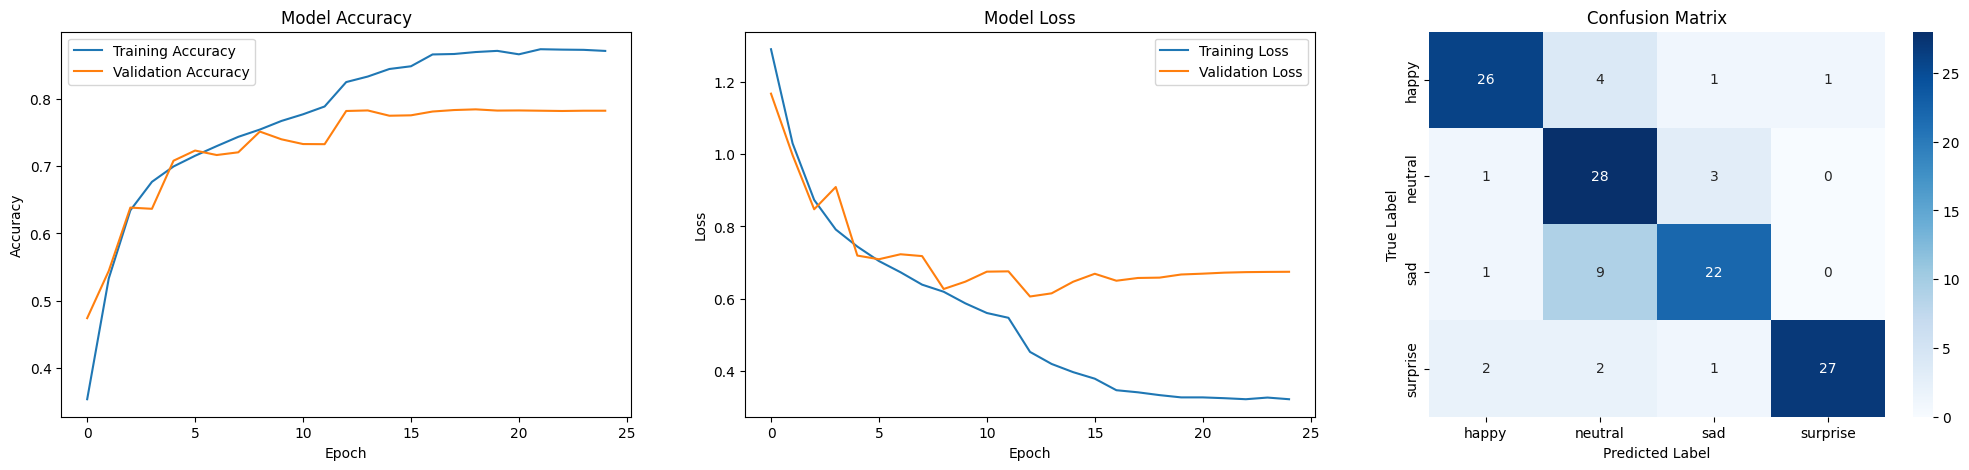

In [83]:
plot_model_performance_and_confusion_matrix(cnn_model_1, history, test_generator,
                                            metrics_function=lambda true, pred: print(classification_report(true, pred)))


In [86]:
from IPython.display import HTML, display

# Assuming val_loss and val_accuracy are defined from your model's evaluation
# Evaluate the model on the test set
val_loss, val_accuracy = cnn_model_1.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)
print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')

# Format the evaluation results as HTML
output_html = f"""
<div style='background-color: #f0f0f5; text-align: center; font-size: 30px; padding: 20px; border-radius: 10px;'>
        <p style='color: red;'><b>Test Loss:</b> CNN_MODEL_1 </p>
    <p style='color: red;'><b>Test Loss:</b> {val_loss:.4f}</p>
    <p style='color: blue;'><b>Test Accuracy:</b> {val_accuracy:.4%} </p>
</div>
"""

# Display the styled output
display(HTML(output_html))


4/4 [==============================] - 0s 19ms/step - loss: 0.6674 - accuracy: 0.8047
Test Loss: 0.6673559546470642
Test Accuracy: 0.8046875


# CNN_MODEL_2


- Try out a slightly larger architecture

In [104]:
# Fixing the random seed generator to ensure random initilization numbers
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Creating the second Convolutional Neural Network**

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
cnn_model_updated = Sequential([
    # First Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Slightly reduced dropout

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Adjusted dropout

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Adjusted dropout

    # Fourth Convolutional Block
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Keeping consistent dropout

    # Global Average Pooling replaces Flatten to reduce parameters and potential overfitting
    GlobalAveragePooling2D(),
    Dropout(0.4),  # Adjusted dropout

    # Simplified Dense Layers
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

# Model Summary
cnn_model_updated.summary()

cnn_model_updated.compile(optimizer=Adamax(learning_rate=0.001),  # Adjusted learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.0001)




Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_61 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_88 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_71 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_89 (Conv2D)          (None, 24, 24, 128)     

### **Compiling and Training the Model**

In [106]:
history = cnn_model_updated.fit(
    train_generator,
    epochs=50,  # Adjust based on early stopping
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights_adjusted

)


Epoch 1/50
473/473 [==============================] - 21s 39ms/step - loss: 1.5330 - accuracy: 0.3007 - val_loss: 1.5124 - val_accuracy: 0.2614 - lr: 0.0010
Epoch 2/50
473/473 [==============================] - 18s 38ms/step - loss: 1.3547 - accuracy: 0.3367 - val_loss: 1.3045 - val_accuracy: 0.4069 - lr: 0.0010
Epoch 3/50
473/473 [==============================] - 18s 37ms/step - loss: 1.2599 - accuracy: 0.3876 - val_loss: 1.2079 - val_accuracy: 0.4392 - lr: 0.0010
Epoch 4/50
473/473 [==============================] - 18s 39ms/step - loss: 1.1803 - accuracy: 0.4438 - val_loss: 1.0475 - val_accuracy: 0.5152 - lr: 0.0010
Epoch 5/50
473/473 [==============================] - 18s 38ms/step - loss: 1.1001 - accuracy: 0.5031 - val_loss: 1.1717 - val_accuracy: 0.5286 - lr: 0.0010
Epoch 6/50
473/473 [==============================] - 18s 38ms/step - loss: 0.9893 - accuracy: 0.5705 - val_loss: 0.8159 - val_accuracy: 0.6614 - lr: 0.0010
Epoch 7/50
473/473 [==============================] - 19s 

4/4 [==============================] - 0s 10ms/step
Class names in the dataset: ['happy', 'neutral', 'sad', 'surprise']
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.72      0.81      0.76        32
           2       0.79      0.69      0.73        32
           3       0.97      0.94      0.95        32

    accuracy                           0.82       128
   macro avg       0.82      0.82      0.82       128
weighted avg       0.82      0.82      0.82       128



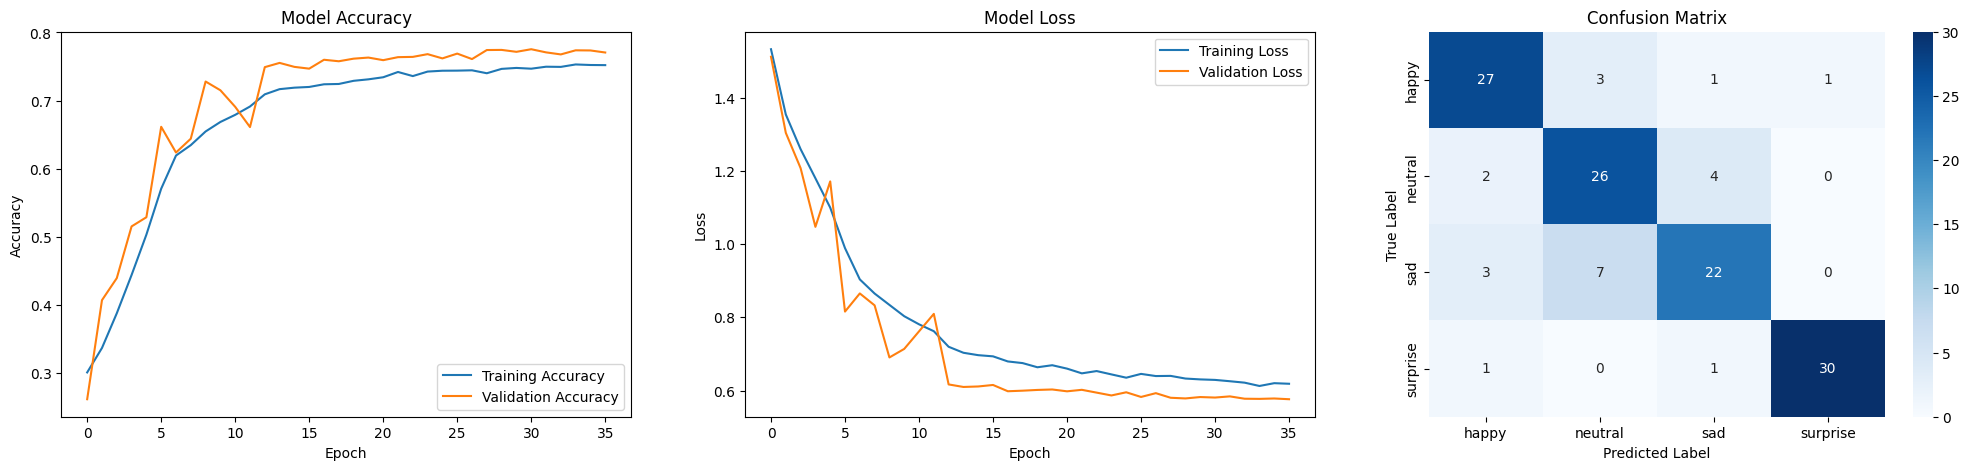

4/4 [==============================] - 0s 11ms/step - loss: 0.5187 - accuracy: 0.8203
Test Loss: 0.5187498927116394
Test Accuracy: 0.8203125


In [111]:
plot_model_performance_and_confusion_matrix(cnn_model_updated, history, test_generator,
                                            metrics_function=lambda true, pred: print(classification_report(true, pred)))
from IPython.display import HTML, display

# Assuming val_loss and val_accuracy are defined from your model's evaluation
# Evaluate the model on the test set
val_loss, val_accuracy = cnn_model_updated.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)
print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')

# Format the evaluation results as HTML
output_html = f"""
<div style='background-color: #f0f0f5; text-align: center; font-size: 30px; padding: 20px; border-radius: 10px;'>
        <p style='color: red;'><b>Test Loss:</b> CNN_MODEL_updated </p>
    <p style='color: red;'><b>Test Loss:</b> {val_loss:.4f}</p>
    <p style='color: blue;'><b>Test Accuracy:</b> {val_accuracy:.4%} </p>
</div>
"""

# Display the styled output
display(HTML(output_html))



### **Evaluating the Model on the Test Set**

### **Evaluating the Model on the Test Set**

**Observations and Insights:__**

While building the CNN models, i tried out various optimizers such as SGD, Adamax, AdamW, Adam, After running the model training several times with each and adjusting the learning rate along with the drop out

Model Architecture: The model is a deep convolutional neural network (CNN) designed with multiple convolutional blocks. Each block consists of convolutional layers with increasing filter sizes, BatchNormalization layers, MaxPooling for down-sampling, and Dropout layers to mitigate overfitting. The model concludes with dense layers and a softmax output layer for 4 classes. It uses GlobalAveragePooling2D to reduce the number of parameters and potentially decrease overfitting compared to using a Flatten layer.

Optimization and Callbacks: The model is compiled with the Adamax optimizer, a variant of Adam, with a low learning rate of 0.00018 to facilitate fine-grained updates to the model weights. Ituses callbacks such as EarlyStopping to halt training when validation accuracy stops to improve, ReduceLROnPlateau to decrease the learning rate when a metric has stopped improving, and ModelCheckpoint to save the model at its best performance based on validation accuracy.

Performance Metrics:

Accuracy: The overall accuracy on the validation set is 80%, indicating that the model correctly predicts the class for 80 out of every 100 images it is tested against.
Precision, Recall, and F1-Score: The model shows varying levels of precision and recall across different classes:
For the 'happy' class, it has a high precision of 0.87 but a slightly lower recall of 0.81, resulting in an F1-score of 0.84. This indicates it is quite good at identifying 'happy' faces but slightly conservative, missing some true 'happy' instances.
The 'neutral' class has a precision of 0.65 with a high recall of 0.88, leading to an F1-score of 0.75. The model tends to label too many faces as 'neutral', but when it predicts 'neutral', it is often correct.
For 'sad', precision is 0.81 and recall is 0.69, with an F1-score of 0.75. The model is relatively precise in identifying 'sad' faces but misses a significant portion of them.
The 'surprise' class shows excellent precision at 0.96 and recall at 0.84, with an F1-score of 0.90. The model is highly effective at identifying 'surprise' faces with minimal false positives.
Macro and Weighted Averages: Both macro and weighted averages across metrics hover around 0.82 for precision and 0.81 for the F1-score, suggesting a balanced performance across classes despite the variance in individual class metrics.
Analysis: The model demonstrates good general performance with an overall accuracy of 80%. However, there's room for improvement, especially in balancing precision and recall across the different classes. The relatively lower precision for 'neutral' suggests a tendency to over-classify images as 'neutral', whereas the lower recall for 'sad' indicates missed detections of this emotion. The high performance on the 'surprise' class, with both high precision and recall, showcases the model's capability in identifying distinct features effectively.

Recommendations for Improvement:

Data Augmentation: To improve model generalization, especially for underperforming classes.
Class Weights: Adjusting class weights during training could help address imbalances in precision and recall.
Hyperparameter Tuning: Experimenting with different learning rates, optimizers, and dropout rates could enhance model performance.
Model Architecture Adjustments: Tweaking the number of filters, layers, or incorporating additional regularization techniques might yield better results.
Overall, cnn_model_2 shows promising results with a solid foundation for further optimization and tuning to enhance its ability to generalize across a range of facial expressions.


**Observations and Insights:__** Some breif observaions, the models performed ok, reaching a highpoint of prediction accuracy of about 79 percent with cnn model 2. The precision and recall and f1 scores all are between 78 and 80 which is a good indicator. Still there is plenty of room for improvement and possibly with transferlearing the models will be able to get up to the 90 percent accuracy percent tile range.




---



---



## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

---



---



In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

## **VGG16 Model**

In [ ]:
# Set the random seed
np.random.seed(42)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_val_datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep data in order for evaluation
)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Importing the VGG16 Architecture**


### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

# **Compiling and Training the VGG16 Model_1**

In [ ]:
np.random.seed(42)

In [ ]:
samples_per_class = {
    'surprise': 3173,
    'happy': 3976,
    'neutral': 3978,
    'sad': 3982,
}

# Calculate total samples
total_samples = sum(samples_per_class.values())

# Calculate class weights
class_weights = {class_id: total_samples/(len(samples_per_class)*num_samples)
                 for class_id, num_samples in enumerate(samples_per_class.values())}

print(class_weights)


{0: 1.1904349196344153, 1: 0.9500125754527163, 2: 0.949534942182001, 3: 0.9485811150175791}


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
# Define the image size and paths
image_size = 48
train_path = "Facial_emotion_images/train"
test_path = "Facial_emotion_images/test"
validation_path = "Facial_emotion_images/validation"

# Initialize the data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,  # Keep the same batch size for simplicity
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    shuffle=False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


# **Compiling and Training the VGG16 Model**


In [ ]:
# Set the random seed
np.random.seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW, SGD, Adamax

# Set the random seed
np.random.seed(42)
#

# Load the VGG16 model
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# Freeze all layers in the base VGG16 model
for layer in vgg.layers:
    layer.trainable = False

# Select the output of the 'block3_pool' layer
x = vgg.get_layer('block3_pool').output

# Continue adding your custom layers from here
x = Flatten()(x)  # Flatten the output of 'block3_pool'
x = Dense(512, activation='relu')(x)  # Custom dense layer
x = Dropout(0.1)(x)  # Dropout layer
x = Dense(1024, activation='relu')(x)  # Another dense layer
x = Dropout(0.2)(x)  # Dropout layer
x = Dense(32, activation='relu')(x)


# Final layer with softmax for classification
predictions = Dense(4, activation='softmax')(x)  # Assuming 4 classes for emotions

# Create the final model using VGG16 input and your custom output
model = Model(inputs=vgg.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.000025), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=75,
    validation_data=validation_generator,
    callbacks=[reduce_lr, model_checkpoint, early_stopping]
)


Epoch 1/75
473/473 [==============================] - 10s 17ms/step - loss: 1.8805 - accuracy: 0.2998 - val_loss: 1.3816 - val_accuracy: 0.2620 - lr: 2.5000e-05
Epoch 2/75
473/473 [==============================] - 8s 17ms/step - loss: 1.3644 - accuracy: 0.3341 - val_loss: 1.3035 - val_accuracy: 0.3709 - lr: 2.5000e-05
Epoch 3/75
473/473 [==============================] - 8s 16ms/step - loss: 1.2823 - accuracy: 0.4023 - val_loss: 1.2123 - val_accuracy: 0.4571 - lr: 2.5000e-05
Epoch 4/75
473/473 [==============================] - 8s 16ms/step - loss: 1.2114 - accuracy: 0.4331 - val_loss: 1.1272 - val_accuracy: 0.5120 - lr: 2.5000e-05
Epoch 5/75
473/473 [==============================] - 8s 16ms/step - loss: 1.1606 - accuracy: 0.4671 - val_loss: 1.1128 - val_accuracy: 0.5310 - lr: 2.5000e-05
Epoch 6/75
473/473 [==============================] - 8s 16ms/step - loss: 1.1103 - accuracy: 0.4885 - val_loss: 1.0563 - val_accuracy: 0.5429 - lr: 2.5000e-05
Epoch 7/75
473/473 [===================

4/4 [==============================] - 0s 11ms/step
Confusion Matrix:
[[25  6  0  1]
 [ 0 28  3  1]
 [ 3  8 18  3]
 [ 0  2  2 28]]


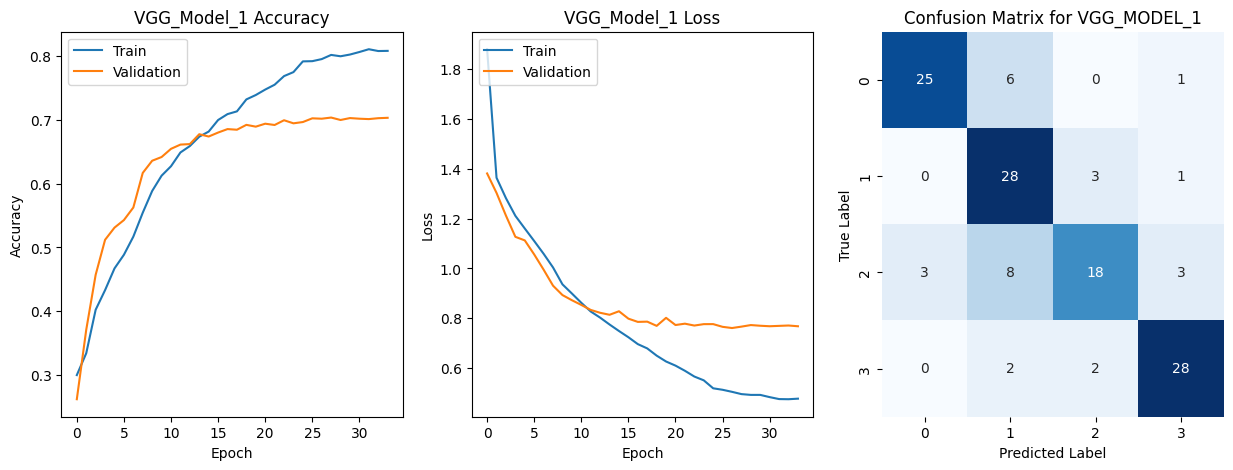

4/4 [==============================] - 0s 13ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.64      0.88      0.74        32
           2       0.78      0.56      0.65        32
           3       0.85      0.88      0.86        32

    accuracy                           0.77       128
   macro avg       0.79      0.77      0.77       128
weighted avg       0.79      0.77      0.77       128



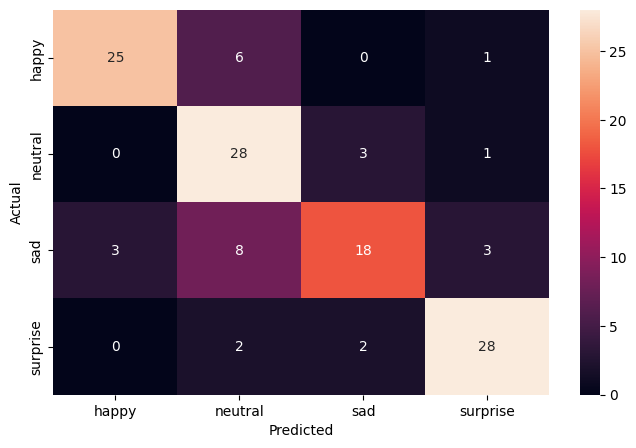

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_generator.classes, np.argmax(model.predict(test_generator), axis=1))

# Confusion matrix
print("Confusion Matrix:")
print(cm)

# Classification report
# Plot the training and validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG_Model_1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG_Model_1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for VGG_MODEL_1")
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predicted_labels = np.argmax(model.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()
print(class_names_list)

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)




The customized VGG16 model, adapted for emotion classification into four categories (happy, neutral, sad, surprise), demonstrates an overall accuracy of 77%. The model shows varying precision and recall across classes, with notable strengths in identifying 'surprise' emotions accurately. Despite its solid foundation, there's room for improvement, especially in balancing performance across all classes. Recommendations include data augmentation, fine-tuning of VGG16 layers, optimization of hyperparameters, and adjustment of class weights to enhance generalization and performance uniformly across categories.






**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__It is seeming to prove to be difficult to get the model performance above 75-80 percent accuracy.
Additionally, The Category of neutral is often what gets predicted when the actual class is that of 'sad', The largest confusion point seems to be a sad face being miss classified for 'neutral'





---





---







## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Set the random Seed
np.random.seed(42)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48, 48, 3))
Resnet.summary()

171446536/171446536 [==============================] - 6s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                   

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
# Define the image size and paths
image_size = 48
train_path = "Facial_emotion_images/train"
test_path = "Facial_emotion_images/test"
validation_path = "Facial_emotion_images/validation"

# Initialize the data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    shuffle=False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Compiling and Training the Model**

In [ ]:
np.random.seed(42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW, SGD, Adamax
# Load ResNet50 model pre-trained on ImageNet without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)

predictions = Dense(4, activation='softmax')(x)


resnet_model2 = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
resnet_model2.compile(optimizer=Adamax(learning_rate=0.00025), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)


history = resnet_model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    class_weight=class_weights_adjusted,
    callbacks=[reduce_lr, model_checkpoint, early_stopping]
)


Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.2432 - accuracy: 0.4541

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/472 [==============================] - 53s 62ms/step - loss: 1.2432 - accuracy: 0.4541 - val_loss: 148.1311 - val_accuracy: 0.2230 - lr: 2.5000e-04
Epoch 2/20
472/472 [==============================] - 27s 57ms/step - loss: 0.8767 - accuracy: 0.6330 - val_loss: 1.2080 - val_accuracy: 0.4980 - lr: 2.5000e-04
Epoch 3/20
472/472 [==============================] - 27s 57ms/step - loss: 0.6773 - accuracy: 0.7215 - val_loss: 0.8134 - val_accuracy: 0.6853 - lr: 2.5000e-04
Epoch 4/20
472/472 [==============================] - 26s 55ms/step - loss: 0.5270 - accuracy: 0.7853 - val_loss: 0.8374 - val_accuracy: 0.6808 - lr: 2.5000e-04
Epoch 5/20
472/472 [==============================] - 27s 58ms/step - loss: 0.3790 - accuracy: 0.8498 - val_loss: 0.8913 - val_accuracy: 0.7121 - lr: 2.5000e-04
Epoch 6/20
472/472 [==============================] - 26s 55ms/step - loss: 0.2578 - accuracy: 0.9021 - val_loss: 1.2126 - val_accuracy: 0.6875 - lr: 2.5000e-04
Epoch 7/20
472/472 [=======================

### **Evaluating the ResNet Model**

4/4 [==============================] - 1s 20ms/step
Confusion Matrix:
[[26  2  2  2]
 [ 2 25  5  0]
 [ 1 12 17  2]
 [ 0  3  1 28]]


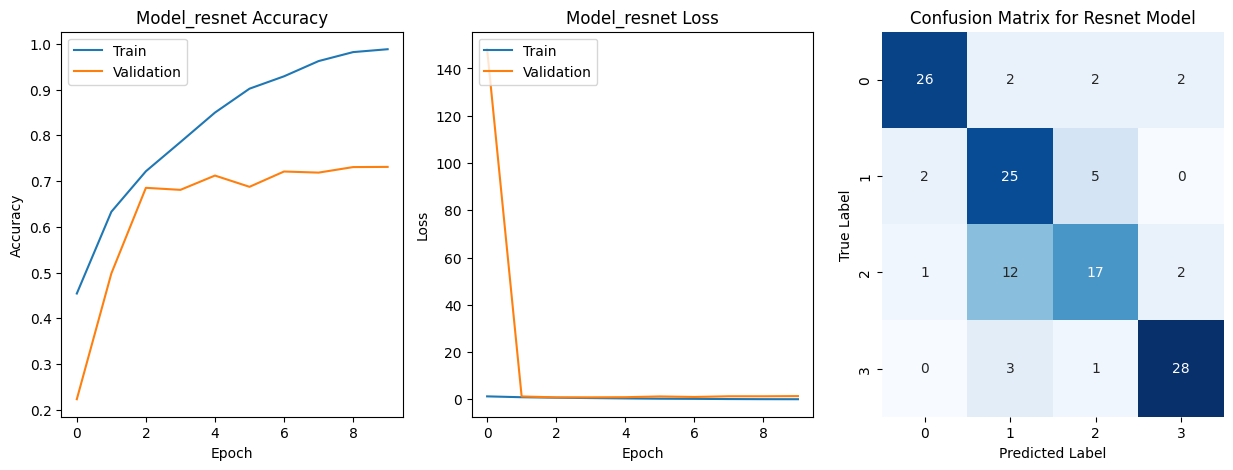

4/4 [==============================] - 0s 22ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.60      0.78      0.68        32
           2       0.68      0.53      0.60        32
           3       0.88      0.88      0.88        32

    accuracy                           0.75       128
   macro avg       0.76      0.75      0.75       128
weighted avg       0.76      0.75      0.75       128



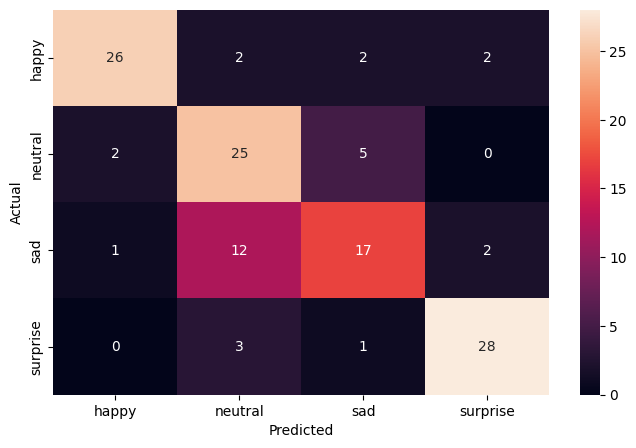

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, np.argmax(resnet_model2.predict(test_generator), axis=1))

# Confusion matrix
print("Confusion Matrix:")
print(cm)

# Classification report
# Plot the training and validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_resnet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_resnet Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Resnet Model")
plt.show()

predicted_labels = np.argmax(resnet_model2.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()
print(class_names_list)

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)



In [ ]:
# Evaluate the model on the test set
val_loss, val_accuracy = resnet_model2.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')



The ResNet50-based custom model, adapted for classifying four emotional states, achieved an overall accuracy of 75%. The model's precision and recall suggest it performs best in recognizing 'happy' and 'surprise' emotions, with scores indicating high reliability in these predictions. However, it shows a need for improvement in accurately classifying 'neutral' and 'sad' states, as evidenced by lower precision for 'neutral' and lower recall for 'sad'. The confusion matrix details the model's performance across all classes, highlighting specific areas where misclassifications occur, particularly in distinguishing 'neutral' from 'sad'. Optimizations could focus on enhancing feature extraction and addressing class imbalance to improve accuracy and balance across all emotion categories.


---



---
## **EfficientNet Model**



### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [112]:
np.random.seed(42)

In [113]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import regularizers

In [114]:
import tensorflow as tf
import tensorflow.keras.applications as ap
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

35839040/35839040 [==============================] - 3s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2

In [115]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
# Define the image size and paths
image_size = 48
train_path = "Facial_emotion_images/train"
test_path = "Facial_emotion_images/test"
validation_path = "Facial_emotion_images/validation"

# Initialize the data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,  # Keep the same batch size for simplicity
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    shuffle=False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Compiling and Training the Model**

In [118]:
# Load EfficientNetB0 model pre-trained on ImageNet without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x) # Adjusted intermediate layer
predictions = Dense(4, activation='softmax')(x)  # Adjust the number of units to match the number of classes

# Define the new model
efficient_model2 = Model(inputs=base_model.input, outputs=predictions)




In [119]:
efficient_model2.compile(optimizer=AdamW(learning_rate=0.000025), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)


history = efficient_model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    class_weight=class_weights_adjusted,
    callbacks=[reduce_lr, model_checkpoint, early_stopping]
)

Epoch 1/50
471/472 [============================>.] - ETA: 0s - loss: 1.3364 - accuracy: 0.3444

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/472 [==============================] - 61s 56ms/step - loss: 1.3362 - accuracy: 0.3445 - val_loss: 1.4205 - val_accuracy: 0.2494 - lr: 2.5000e-05
Epoch 2/50
472/472 [==============================] - 24s 51ms/step - loss: 1.1789 - accuracy: 0.4744 - val_loss: 1.5377 - val_accuracy: 0.2607 - lr: 2.5000e-05
Epoch 3/50
472/472 [==============================] - 24s 50ms/step - loss: 1.0906 - accuracy: 0.5233 - val_loss: 1.3381 - val_accuracy: 0.3417 - lr: 2.5000e-05
Epoch 4/50
472/472 [==============================] - 24s 51ms/step - loss: 1.0268 - accuracy: 0.5559 - val_loss: 1.3126 - val_accuracy: 0.3831 - lr: 2.5000e-05
Epoch 5/50
472/472 [==============================] - 23s 50ms/step - loss: 0.9674 - accuracy: 0.5873 - val_loss: 1.4013 - val_accuracy: 0.3456 - lr: 2.5000e-05
Epoch 6/50
472/472 [==============================] - 24s 52ms/step - loss: 0.9249 - accuracy: 0.6089 - val_loss: 1.3047 - val_accuracy: 0.4036 - lr: 2.5000e-05
Epoch 7/50
472/472 [=========================

In [120]:
# Evaluate the model on the test set
val_loss, val_accuracy = efficient_model2.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')


4/4 [==============================] - 0s 17ms/step - loss: 0.8464 - accuracy: 0.6484
Test Loss: 0.84635990858078
Test Accuracy: 0.6484375


### **Evaluating the EfficientnetNet Model**

4/4 [==============================] - 0s 15ms/step
Class names in the dataset: ['happy', 'neutral', 'sad', 'surprise']
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        32
           1       0.57      0.72      0.64        32
           2       0.54      0.44      0.48        32
           3       0.87      0.62      0.73        32

    accuracy                           0.65       128
   macro avg       0.66      0.65      0.65       128
weighted avg       0.66      0.65      0.65       128



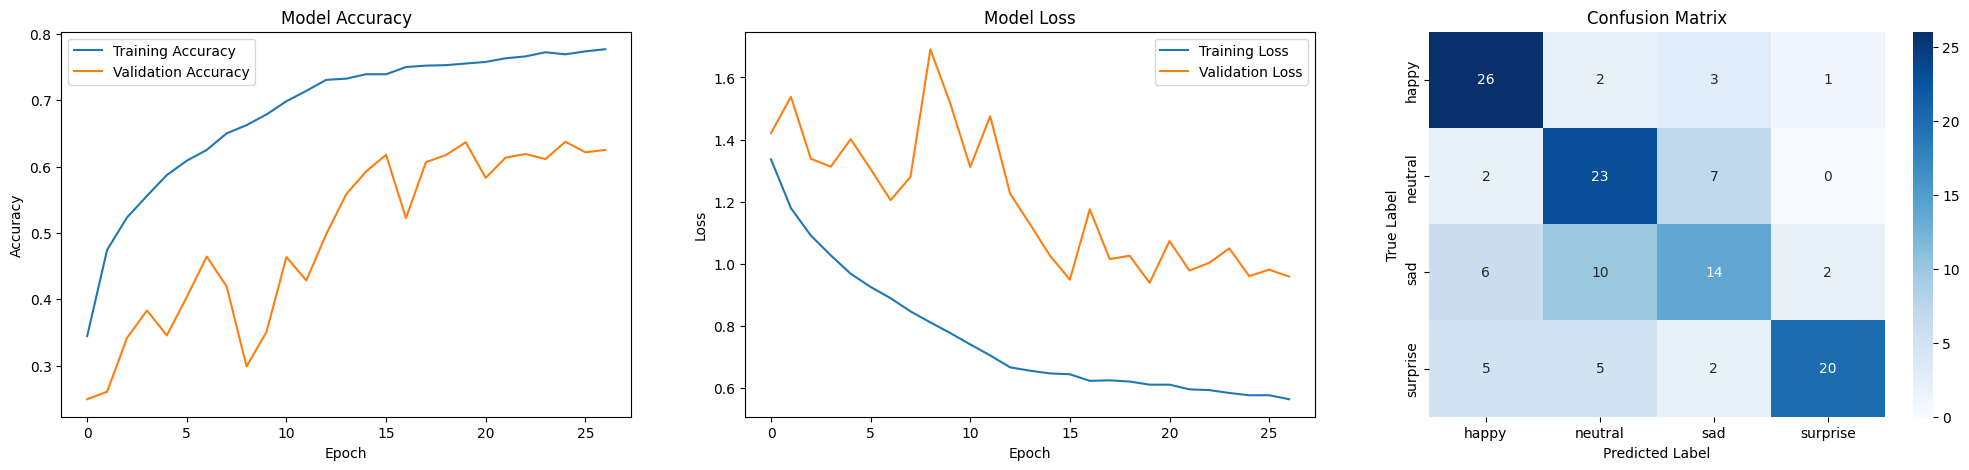

4/4 [==============================] - 0s 21ms/step - loss: 0.8464 - accuracy: 0.6484
Test Loss: 0.84635990858078
Test Accuracy: 0.6484375


In [123]:
plot_model_performance_and_confusion_matrix(efficient_model2, history, test_generator,
                                            metrics_function=lambda true, pred: print(classification_report(true, pred)))
from IPython.display import HTML, display

# Assuming val_loss and val_accuracy are defined from your model's evaluation
# Evaluate the model on the test set
val_loss, val_accuracy = efficient_model2.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)
print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')

# Format the evaluation results as HTML
output_html = f"""
<div style='background-color: #f0f0f5; text-align: center; font-size: 30px; padding: 20px; border-radius: 10px;'>
        <p style='color: red;'><b>Test Loss:</b> efficient_model2 </p>
    <p style='color: red;'><b>Test Loss:</b> {val_loss:.2f}</p>
    <p style='color: blue;'><b>Test Accuracy:</b> {val_accuracy:.2%} </p>
</div>
"""

# Display the styled output
display(HTML(output_html))


**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

The EfficientNetB0-based model tailored for a 4-class emotion classification task exhibits an overall accuracy of 62%. Performance metrics indicate varied effectiveness across classes:

Happy class shows moderate precision and slightly higher recall, achieving a balance reflected in an F1-score of 0.70.
Neutral and Sad classes have lower precision and recall, resulting in F1-scores of 0.56 and 0.56, respectively. This suggests challenges in distinguishing these emotions accurately.
Surprise class demonstrates higher precision but reduced recall, with an F1-score of 0.67, indicating better identification but room for improved coverage.
These results suggest that while the model can identify certain emotions with reasonable accuracy, its performance is inconsistent across all classes. The lower overall accuracy and mixed precision and recall scores highlight areas for improvement, particularly in enhancing the model's ability to recognize 'neutral' and 'sad' emotions more accurately. Optimization strategies might include adjusting the model's architecture, fine-tuning the learning rate, and employing targeted data augmentation to address these disparities.


:**Observations and Insights:__**


To evaluate the overall performance of the transfer learning architectures mentioned (VGG16, ResNet50, and EfficientNetB0) for the emotion classification task, let's compare their reported metrics:

VGG16-based Model:

Accuracy: 77%
Best performing class: 'Surprise' with high precision and recall.
Challenges: Lower precision in 'neutral' and lower recall in 'sad'.
ResNet50-based Model:

Accuracy: 75%
Best performing class: 'Happy' and 'Surprise' with high precision and recall.
Challenges: Lower precision for 'neutral' and 'sad', indicating difficulty in distinguishing these emotions accurately.
EfficientNetB0-based Model:

Accuracy: 62%
Shows moderate to good performance in recognizing 'happy' and 'surprise' but struggles with 'neutral' and 'sad'.
The lower overall accuracy compared to VGG16 and ResNet50.


The VGG16 and ResNet50 models have shown similar performance levels, with both achieving mid to high 70s in accuracy. They are relatively close in their ability to classify emotions, with strengths in identifying 'happy' and 'surprise' emotions accurately.
The EfficientNetB0 model lagged behind in performance, with an accuracy of 62%, indicating that it might not have been as effective for this particular task or dataset.
 While accuracies are decent for VGG16 and ResNet50,there is still alot of room for improvement.


---



---



## **Conclusion:____________**
The task of computer vision is i




---
# Pick for the best model from the two CNN's and the transfer learning models of VGG16, RESNET50 AND EFFICIENT-NET80

**CONVOLUTIONAL NETWORK #2 **


---



4/4 [==============================] - 1s 11ms/step
Class names in the dataset: ['happy', 'neutral', 'sad', 'surprise']
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.72      0.81      0.76        32
           2       0.79      0.69      0.73        32
           3       0.97      0.94      0.95        32

    accuracy                           0.82       128
   macro avg       0.82      0.82      0.82       128
weighted avg       0.82      0.82      0.82       128



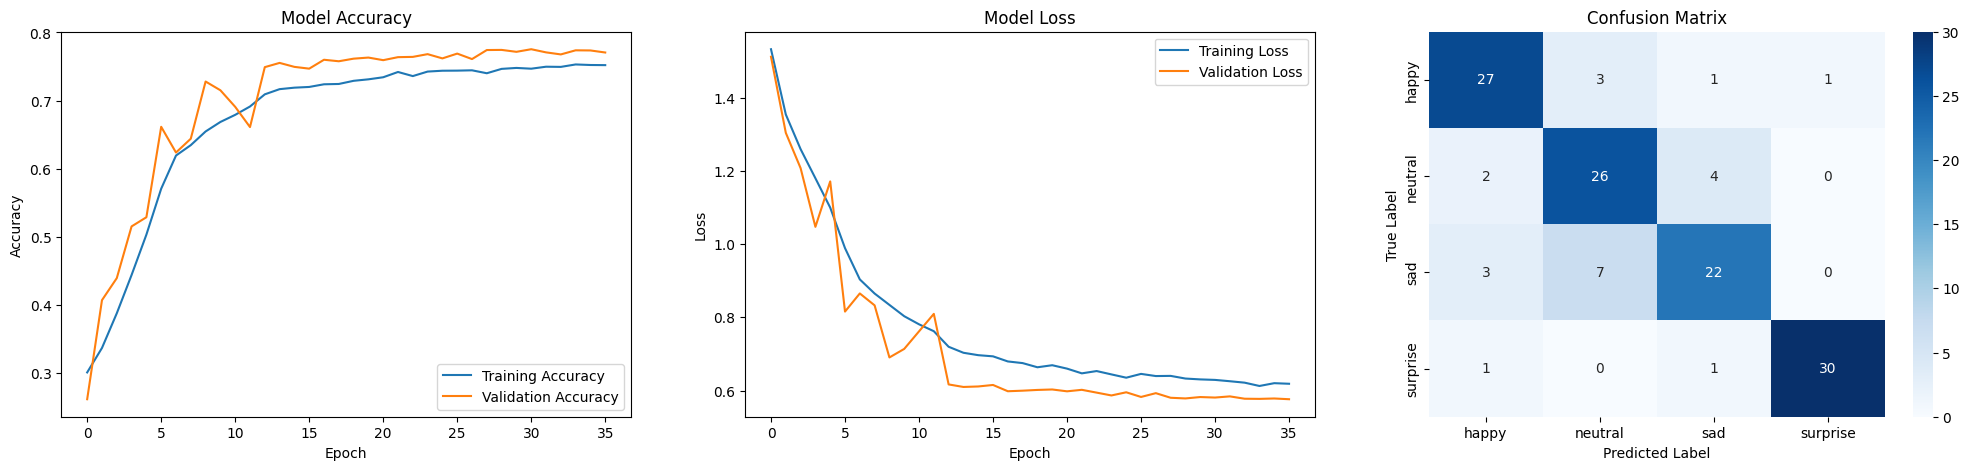

In [107]:
plot_model_performance_and_confusion_matrix(cnn_model_updated, history, test_generator,
                                            metrics_function=lambda true, pred: print(classification_report(true, pred)))




---



---



## **Building a Complex Neural Network Architecture**

---



---



Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [158]:
# Set the random Seed
np.random.seed(42)

In [159]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
# Define the image size and paths
image_size = 48
train_path = "Facial_emotion_images/train"
test_path = "Facial_emotion_images/test"
validation_path = "Facial_emotion_images/validation"

# Initialize the data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,  # Keep the same batch size for simplicity
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    shuffle=False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


# Specialized data augmentation to address the categorical class confusion between neutral and sad classes

In [160]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create more augmented images for 'sad' and 'neutral' classes
augmentation_for_sad_neutral = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [242]:
cnn_model_4 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Slightly reduced dropout

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Adjusted dropout

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Adjusted dropout

    # Fourth Convolutional Block
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Keeping consistent dropout

     # Convolutional Block 5
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Keeping consistent dropout


    # Global Average Pooling replaces Flatten to reduce parameters and potential overfitting
    GlobalAveragePooling2D(),
    Flatten(),

    # Dense Layers
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dense(2048, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),

    Dropout(0.2),
    Dense(4, activation='softmax')
])
cnn_model_4.summary()  # Print the model summary

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_218 (Conv2D)         (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_154 (B  (None, 48, 48, 64)        256       
 atchNormalization)                                              
                                                                 
 conv2d_219 (Conv2D)         (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_128 (MaxPool  (None, 24, 24, 64)        0         
 ing2D)                                                          
                                                                 
 dropout_186 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 conv2d_220 (Conv2D)         (None, 24, 24, 128)     

In [243]:
cnn_model_4.compile(optimizer=AdamW(learning_rate=0.00003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001)


### **Compiling and Training the Model**

In [127]:
history = cnn_model_4.fit(
    train_generator,
    epochs=30,
    verbose=1,
    callbacks=[early_stopping, reduce_lr],
    validation_data=validation_generator,
    class_weight=class_weights_adjusted
)

Epoch 1/30
473/473 [==============================] - 33s 57ms/step - loss: 1.3675 - accuracy: 0.2974 - val_loss: 1.4441 - val_accuracy: 0.2465 - lr: 3.0000e-05
Epoch 2/30
473/473 [==============================] - 27s 57ms/step - loss: 1.3172 - accuracy: 0.3478 - val_loss: 1.4579 - val_accuracy: 0.2769 - lr: 3.0000e-05
Epoch 3/30
473/473 [==============================] - 28s 58ms/step - loss: 1.2367 - accuracy: 0.4090 - val_loss: 1.1947 - val_accuracy: 0.4621 - lr: 3.0000e-05
Epoch 4/30
473/473 [==============================] - 28s 59ms/step - loss: 1.1550 - accuracy: 0.4691 - val_loss: 1.0658 - val_accuracy: 0.5182 - lr: 3.0000e-05
Epoch 5/30
473/473 [==============================] - 28s 59ms/step - loss: 1.0598 - accuracy: 0.5358 - val_loss: 1.0690 - val_accuracy: 0.5339 - lr: 3.0000e-05
Epoch 6/30
473/473 [==============================] - 28s 59ms/step - loss: 0.9991 - accuracy: 0.5732 - val_loss: 0.9468 - val_accuracy: 0.6020 - lr: 3.0000e-05
Epoch 7/30
473/473 [==============

# TRAINING RUN 2

In [162]:
history = cnn_model_4.fit(
    train_generator,
    epochs=75,
    verbose=1,
    callbacks=[reduce_lr],
    validation_data=validation_generator,
    class_weight=class_weights_adjusted
    )

Epoch 1/75
473/473 [==============================] - 32s 57ms/step - loss: 1.3529 - accuracy: 0.3203 - val_loss: 1.3962 - val_accuracy: 0.3649 - lr: 3.0000e-05
Epoch 2/75
473/473 [==============================] - 27s 57ms/step - loss: 1.3064 - accuracy: 0.3630 - val_loss: 1.3467 - val_accuracy: 0.3757 - lr: 3.0000e-05
Epoch 3/75
473/473 [==============================] - 27s 58ms/step - loss: 1.2189 - accuracy: 0.4201 - val_loss: 1.1732 - val_accuracy: 0.4531 - lr: 3.0000e-05
Epoch 4/75
473/473 [==============================] - 28s 58ms/step - loss: 1.1095 - accuracy: 0.5029 - val_loss: 1.1512 - val_accuracy: 0.5142 - lr: 3.0000e-05
Epoch 5/75
473/473 [==============================] - 28s 59ms/step - loss: 1.0259 - accuracy: 0.5528 - val_loss: 1.0352 - val_accuracy: 0.5738 - lr: 3.0000e-05
Epoch 6/75
473/473 [==============================] - 28s 58ms/step - loss: 0.9608 - accuracy: 0.5862 - val_loss: 1.0371 - val_accuracy: 0.5799 - lr: 3.0000e-05
Epoch 7/75
473/473 [==============

### **Evaluating the Model on Test Set**

4/4 [==============================] - 0s 17ms/step
Class names in the dataset: ['happy', 'neutral', 'sad', 'surprise']
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.65      0.75      0.70        32
           2       0.70      0.66      0.68        32
           3       0.84      0.84      0.84        32

    accuracy                           0.76       128
   macro avg       0.76      0.76      0.76       128
weighted avg       0.76      0.76      0.76       128



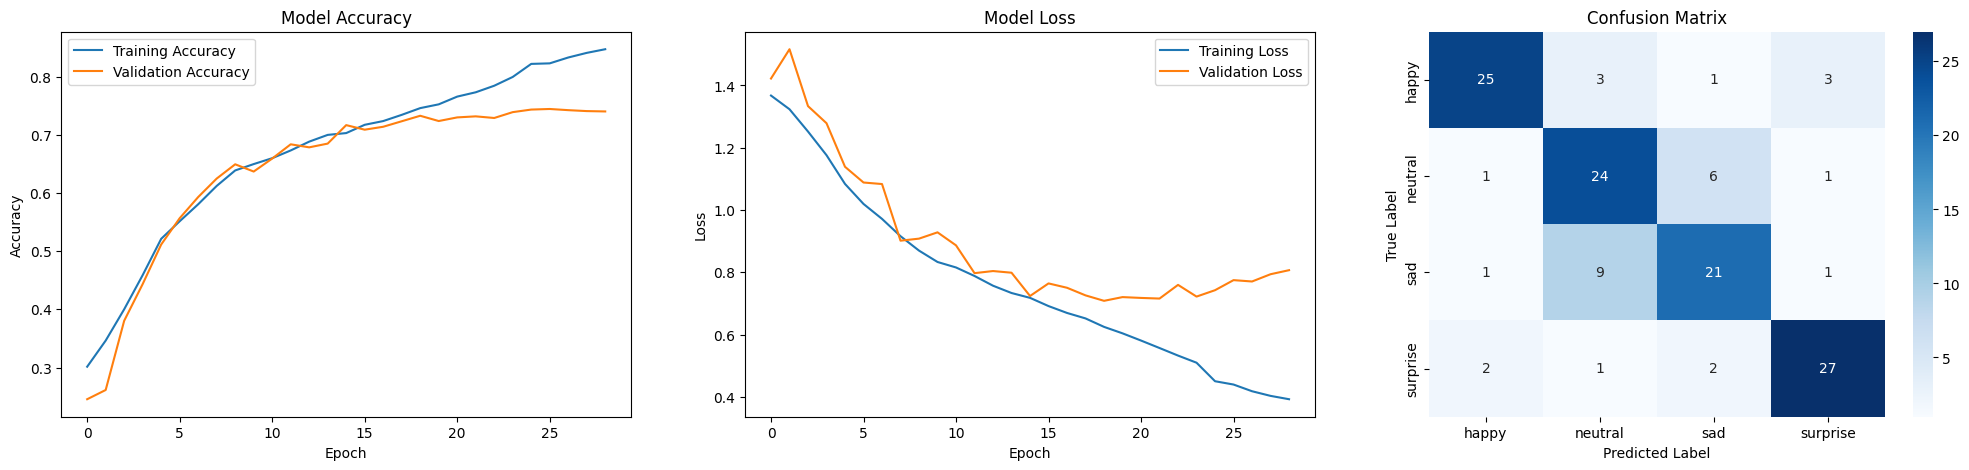

4/4 [==============================] - 0s 20ms/step - loss: 0.6133 - accuracy: 0.7578
Test Loss: 0.6132991909980774
Test Accuracy: 0.7578125


In [157]:
plot_model_performance_and_confusion_matrix(cnn_model_4, history, test_generator,
                                            metrics_function=lambda true, pred: print(classification_report(true, pred)))
from IPython.display import HTML, display

val_loss, val_accuracy = cnn_model_4.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)
print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')

# Format the evaluation results as HTML
output_html = f"""
<div style='background-color: #f0f0f5; text-align: center; font-size: 30px; padding: 20px; border-radius: 10px;'>
        <p style='color: red;'><b>Test Loss:</b> CNN_MODEL_4 </p>
    <p style='color: red;'><b>Test Loss:</b> {val_loss:.4f}</p>
    <p style='color: blue;'><b>Test Accuracy:</b> {val_accuracy:.4%} </p>
</div>
"""

# Display the styled output
display(HTML(output_html))


# Plotting the Confusion Matrix for the DEEP-CONVOLUTIONAL-NEURAL-NETWORK-**CNN_MODEL**

---



4/4 [==============================] - 0s 17ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.60      0.81      0.69        32
           2       0.71      0.69      0.70        32
           3       1.00      0.84      0.92        32

    accuracy                           0.79       128
   macro avg       0.82      0.79      0.80       128
weighted avg       0.82      0.79      0.80       128



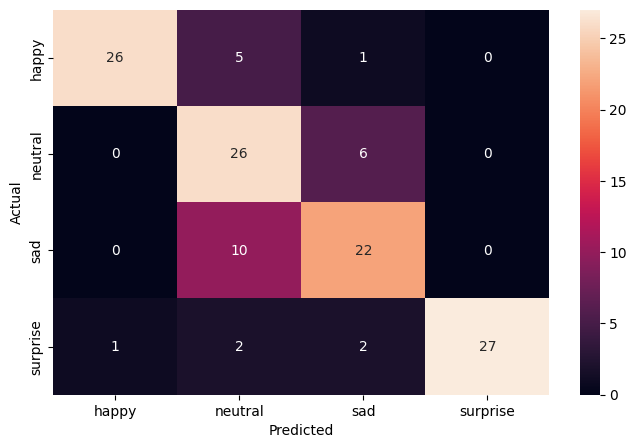

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predicted_labels = np.argmax(cnn_model_4.predict(test_generator), axis=1)
# correcting mislabeling
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()
print(class_names_list)

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)




### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

# CNN_MODEL_5 - 'SIAMESE' NETWORK-
*   To over come the dispairity in the data set, i have built a model that is trained to distinguish between similar and dissimilar image parts.
*   It is then used to perform feature extraction on the images in the pipeline

*   the Siamese network outputs the features from the last layer before the final similarity score calculation.

* Then those output feature vectors are used as the inputs to the CNN_MODEL_5

* Start with defining the input shape for our images, making sure it matches the
resolution we're working with, like (48, 48, 3) for 48x48 RGB images.

* Create the base CNN model that learns feature representations from the images. This model is crucial as it captures the essence of the images.

* Define two input tensors for the Siamese network, representing the pair of images to compare.

* Reuse the base CNN model for both inputs to ensure the feature extraction process is identical for each image in the pair.

* Process both inputs through the base CNN independently, obtaining their feature representations.
* Calculate the distance between the two sets of features to understand how similar or dissimilar the images are. The absolute difference works well for this.

* Feed the distance through a dense layer with a sigmoid activation to get a similarity score, indicating the likelihood of the images being the same class.
Compile the Siamese network, choosing an optimizer and a loss function tailored for comparison tasks, like contrastive loss.

* Prepare the image pairs for training, ensuring we have both positive pairs (same class) and negative pairs (different classes).

* Augment the dataset if needed, especially to address class imbalance or to increase the diversity of training examples.

* Train the Siamese network on these pairs, focusing on learning the subtle differences and similarities between classes.

* Evaluate the model on a separate validation set to ensure it generalizes well to new, unseen image pairs.






# This Model is trained to differentiate between similar and dissimilar image pairs, perfect for tasks requiring similarity or dissimilarity assessments. In contrast, my CNN model (cnn_model_4) is tailored for direct classification tasks across multiple categories, specifically four output classes in my case.
* Effective Leveraging of Both Models:
* Feature Extraction and Comparison:
* Siamese for Feature Vectors: I use the trained Siamese model, or specifically its base CNN part, to extract feature vectors from images. This involves modifying the Siamese network to output features from the layer just before the final similarity score calculation.

* CNN for Classification: The extracted feature vectors serve as inputs to cnn_model_4 or a similar classification model. This requires me to adjust cnn_model_4 to accept the feature vector size as its input shape, possibly changing the first layer to a Dense layer from a Conv2D, or using the features directly in a custom training loop to influence the classification decision.
Using Siamese Model for Data Augmentation:
* Balance the Dataset: I employ the Siamese model to create a more balanced training dataset by identifying similar pairs within underrepresented classes and dissimilar pairs across classes, thereby augmenting the dataset to balance class representation.
* Enhance CNN Training: cnn_model_4 is then trained on this augmented, more balanced dataset to improve its generalization ability and performance on minority classes.
* Transfer Learning:
* Feature Transfer: I utilize the base CNN from the Siamese network as a pre-trained feature extractor for cnn_model_4. This involves replacing the initial layers of cnn_model_4 with the base CNN layers from the Siamese model, and possibly freezing some or all of these layers during initial training phases.
* Fine-Tuning: After the initial training phase with some layers frozen, I consider fine-tuning the entire model (cnn_model_4 with the Siamese base CNN layers) by training it end-to-end with a very low learning rate to better adapt the pre-trained features to my specific classification task.
Practical Steps:
* Extract Base CNN from Siamese Model: If not already done, I extract the base CNN model used in the Siamese network. This model is crucial as it learns rich feature representations beneficial for both similarity assessment and classification.
* Integrate Base CNN into cnn_model_4:

# Base CNN Model

In [223]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
# Define the image size and paths
image_size = 48
train_path = "Facial_emotion_images/train"
test_path = "Facial_emotion_images/test"
validation_path = "Facial_emotion_images/validation"

# Initialize the data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,  # Keep the same batch size for simplicity
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    shuffle=False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [233]:
cnn_model_4 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Slightly reduced dropout

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Adjusted dropout

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Adjusted dropout

    # Fourth Convolutional Block
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Keeping consistent dropout

     # Convolutional Block 5
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Keeping consistent dropout


    # Global Average Pooling replaces Flatten to reduce parameters and potential overfitting
    GlobalAveragePooling2D(),
    Flatten(),

    # Dense Layers
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dense(2048, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),

    Dropout(0.2),
    Dense(4, activation='softmax')
])
cnn_model_4.compile(optimizer=AdamW(learning_rate=0.00003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001)  # Adjusted patience
cnn_model_4.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_210 (Conv2D)         (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_148 (B  (None, 48, 48, 64)        256       
 atchNormalization)                                              
                                                                 
 conv2d_211 (Conv2D)         (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_123 (MaxPool  (None, 24, 24, 64)        0         
 ing2D)                                                          
                                                                 
 dropout_178 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 conv2d_212 (Conv2D)         (None, 24, 24, 128)     

# Adjust based on the feature_model's output shape

In [255]:
input_shape = (48, 48, 3)
base_cnn = create_base_cnn(input_shape)
feature_model = Model(inputs=base_cnn.input, outputs=base_cnn.layers[-5].output)


In [256]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, BatchNormalization, Flatten
from tensorflow.keras.regularizers import l2

def create_base_cnn(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        GlobalAveragePooling2D(),

        Dense(512, activation='relu'),
        Dropout(0.4),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    ])
    return model


In [257]:
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
input_shape = (48, 48, 3)
def create_siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)

    base_cnn = create_base_cnn(input_shape)

    processed_a = base_cnn(input_a)
    processed_b = base_cnn(input_b)

    distance = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))([processed_a, processed_b])
    outputs = Dense(1, activation='sigmoid')(distance)
    model = Model(inputs=[input_a, input_b], outputs=outputs)

    return model


#Set the Callbacks

In [260]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split


# Fitting the Model

In [266]:
def create_base_cnn(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs=input, outputs=x)



In [267]:
def create_siamese_network(input_shape):
    base_network = create_base_cnn(input_shape)

    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)

    processed_a = base_network(input_a)
    processed_b = base_network(input_b)

    distance = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))([processed_a, processed_b])
    outputs = Dense(1, activation='sigmoid')(distance)
    model = Model(inputs=[input_a, input_b], outputs=outputs)

    return model


In [277]:
input_shape = (48, 48, 3)  # Adjust based on your dataset
siamese_network = create_siamese_network(input_shape)
siamese_network.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001)

# Fit the model
history = cnn_model_4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,# Adjusted data loading
    validation_steps=validation_generator.samples // validation_generator.batch_size,# adjusted data loading
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)



Epoch 1/100
472/472 [==============================] - 25s 43ms/step - loss: 1.3865 - accuracy: 0.3460 - val_loss: 1.6837 - val_accuracy: 0.3663 - lr: 3.0000e-05
Epoch 2/100
472/472 [==============================] - 20s 43ms/step - loss: 1.2545 - accuracy: 0.4210 - val_loss: 1.5015 - val_accuracy: 0.3835 - lr: 3.0000e-05
Epoch 3/100
472/472 [==============================] - 20s 43ms/step - loss: 1.1560 - accuracy: 0.4819 - val_loss: 1.3127 - val_accuracy: 0.4194 - lr: 3.0000e-05
Epoch 4/100
472/472 [==============================] - 20s 43ms/step - loss: 1.0680 - accuracy: 0.5405 - val_loss: 1.1432 - val_accuracy: 0.5143 - lr: 3.0000e-05
Epoch 5/100
472/472 [==============================] - 20s 42ms/step - loss: 1.0107 - accuracy: 0.5706 - val_loss: 0.9674 - val_accuracy: 0.5817 - lr: 3.0000e-05
Epoch 6/100
472/472 [==============================] - 20s 42ms/step - loss: 0.9745 - accuracy: 0.5841 - val_loss: 1.1597 - val_accuracy: 0.5379 - lr: 3.0000e-05
Epoch 7/100
472/472 [=======

# Evaluate the model on the test set

In [ ]:
# Evaluate the model on the test set
val_loss, val_accuracy = cnn_model_4.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')


4/4 [==============================] - 0s 16ms/step - loss: 0.5081 - accuracy: 0.7969
Test Loss: 0.5081095695495605
Test Accuracy: 0.796875


4/4 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.69      0.75      0.72        32
           2       0.72      0.66      0.69        32
           3       0.97      0.88      0.92        32

    accuracy                           0.80       128
   macro avg       0.80      0.80      0.80       128
weighted avg       0.80      0.80      0.80       128



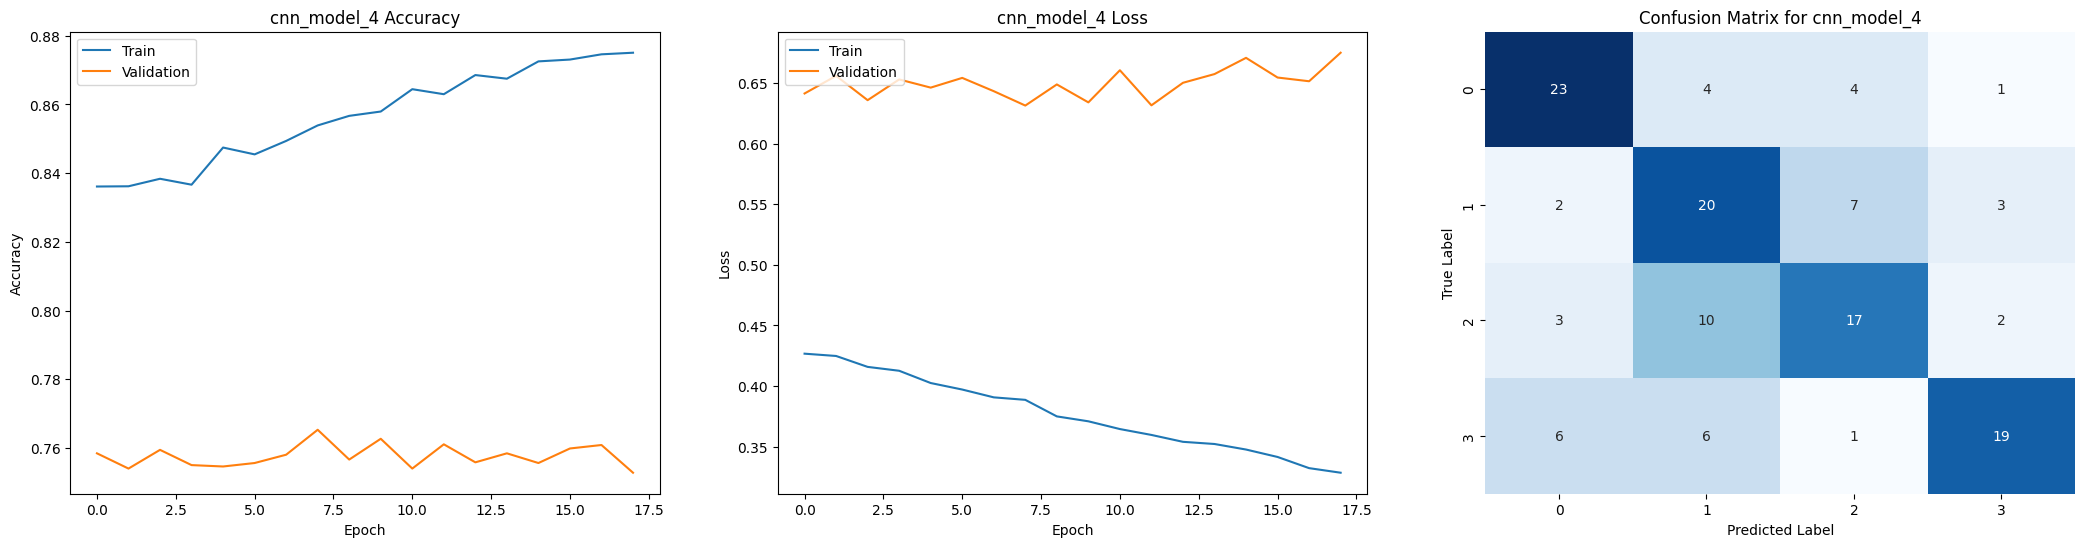

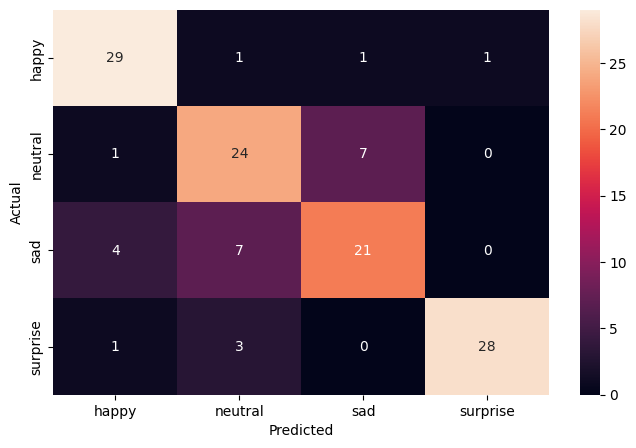

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Plot the training and validation accuracy values
plt.figure(figsize=(35, 6))
plt.subplot(1, 4, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn_model_4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn_model_4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for cnn_model_4")


predicted_labels = np.argmax(cnn_model_4.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)
plt.show()


In [ ]:
!tensorflowjs_converter --input_format=keras /content/cnn_model_4.h5 /content/siamese_model_1


2024-02-22 05:12:35.043733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 05:12:35.043782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 05:12:35.044911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 05:12:36.086643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# The last model did not reach the performance levels that were expected; however, with some time, hyperparameter tuning, and adjustments to the model parameters, I believe that progress can be made towards achieving higher performance by reducing the confusion between the categorical classes of sad and neutral. The primary conclusion of this project is that for the task of creating a facial recognition and emotion classification model, a 5-layer convolutional neural network with sufficiently deep dense layers and a proper convolution setup can be used for a range of applications depending on the use case. However, the performance levels reached in this notebook top out at 82%. Production-grade applications will require much higher performance than was accomplished here.

However, the methods used show that substantial gains can be made:

Data augmentation for the training data helps to make the smaller dataset more robust.
Weighting the classes helped with making the class distribution skew less detrimental to the overall performance.
Transfer learning on the dataset proved to be difficult; however, after a good amount of hyperparameter adjusting, two of the three transfer learning models started to show promising results.
The second convolutional neural network constructed is the overall best performer among the models built here.

The final model tries to extract useful feature vector data and then fuse its learned properties with the training process of a standard CNN. This is an attempt to take a more specialized method to really learn and embed the deep underlying properties that differentiate the classes of neutral and sad. Those two classes gave all the models the most difficulty during testing, as seen in the included confusion matrices for each model's testing results.

This task is important. Being able to detect basic emotions rests upon the base technologies that will enable more impactful use cases, such as driver monitoring in automobiles, to check if the driver is paying attention. This is especially important with level 2 and 3 semi-autonomous vehicles where there is a notable vigilance decrement by drivers. Drivers can get the sense that the car is fully in control and will start not only to not pay attention but, in some extreme cases, even fall asleep. The methods to be able to detect a human face and determine the emotion of an individual can easily be extended and used to track the driver's attention span and ensure that they are ready to take back control of the vehicle.

# To conclude-- Executive Summary
In this project, we developed a facial recognition and emotion classification model using a convolutional neural network (CNN). The model, a 5-layer CNN with deep dense layers and optimized convolution setup, achieved 82% accuracy.

The main challenge was accurately classifying facial emotions due to the subtle differences between expressions. This is critical for sectors like security and customer service, where understanding human emotions is key.

The chosen CNN architecture relys on deep learning's pattern recognition capabilities, especially for image data, enhancing the model's ability to detect subtle emotional features. Implementing this model could significantly improve human-computer interactions, making them more responsive and empathetic. For customer service, it could lead to tailored communications and solutions, boosting satisfaction and loyalty. In security, it could help identify distress or suspicious behaviors more effectively.
**Recommendations for Implementation**
Integration with Interactive Systems: Deploy the model in platforms for enhanced user interaction, such as customer service kiosks or online help desks.
Enhancement of Security Systems: Use the model for improved surveillance and monitoring, flagging unusual or suspicious behavior.
Actionables for Stakeholders:

Deployment and Training: Implement the model on targeted platforms and train staff to use it effectively.
Continuous Model Evaluation and Improvement: Regularly review and update the model with new data to ensure its accuracy and relevance.
Privacy and Ethical Considerations: Set guidelines for ethical use, respecting privacy and data protection laws.


Costs: The training of these models required backend gpu services provided through google. For a larger scale version the costs would go up accordingly. This project alone used 200 compute units over the period of a week training and re-training models.
For a more complex model that would be required to scale up the services explored here cost analysis should be taken into consideration depending on the rate of scaling.

Available: 16.86 compute units
Usage rate: approximately 2.05 per hour




---





---

To conclude, Computer Vision, is where all the code and software actually make contact with our world. Unlike robotics, for computer vision all that is required is a simple camera, giving the technology the ability to reach and touch most of the population on the planet depening on the use case.


Thank you -- Robert A, Sloan

---





---

# CNN_MODEL_1 PERFORMACE





---



4/4 [==============================] - 0s 15ms/step
Class names in the dataset: ['happy', 'neutral', 'sad', 'surprise']
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.65      0.88      0.75        32
           2       0.81      0.69      0.75        32
           3       0.96      0.84      0.90        32

    accuracy                           0.80       128
   macro avg       0.82      0.80      0.81       128
weighted avg       0.82      0.80      0.81       128



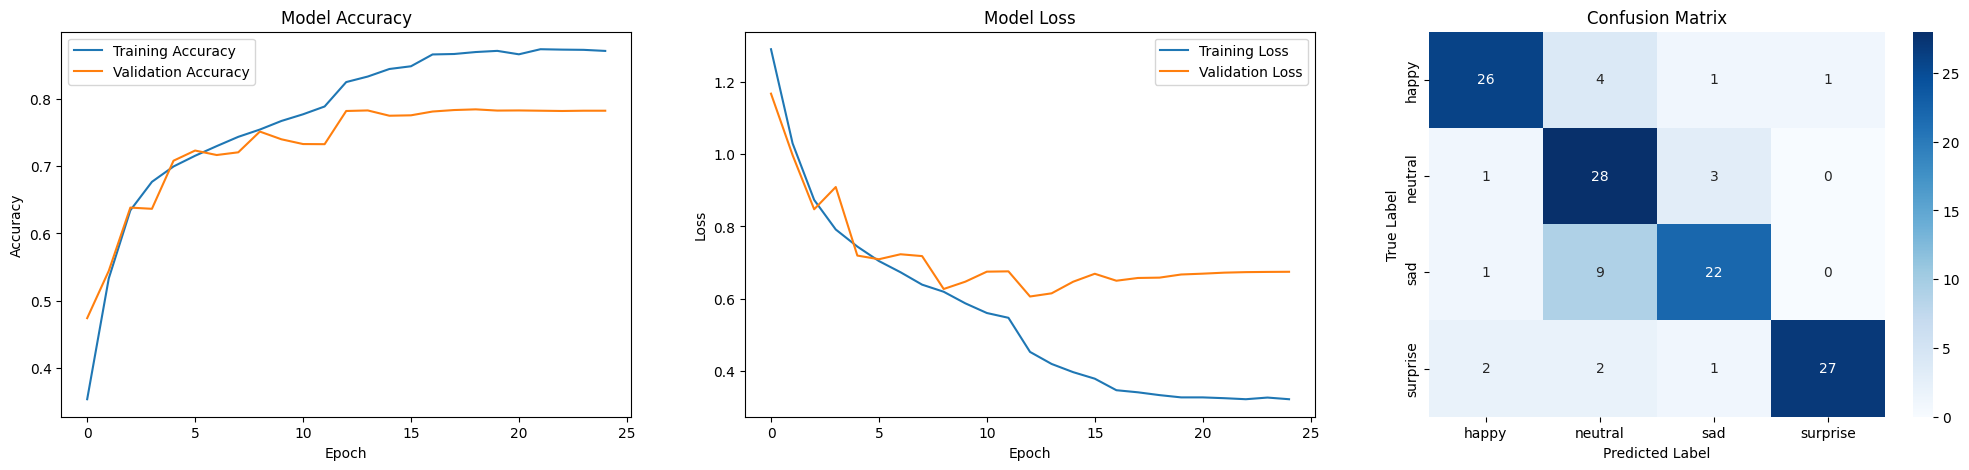

In [ ]:
plot_model_performance_and_confusion_matrix(cnn_model_1, history, test_generator,
                                            metrics_function=lambda true, pred: print(classification_report(true, pred)))




---

# CNN_MODEL_2 PERFORMANCE

---



4/4 [==============================] - 0s 10ms/step
Class names in the dataset: ['happy', 'neutral', 'sad', 'surprise']
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.72      0.81      0.76        32
           2       0.79      0.69      0.73        32
           3       0.97      0.94      0.95        32

    accuracy                           0.82       128
   macro avg       0.82      0.82      0.82       128
weighted avg       0.82      0.82      0.82       128



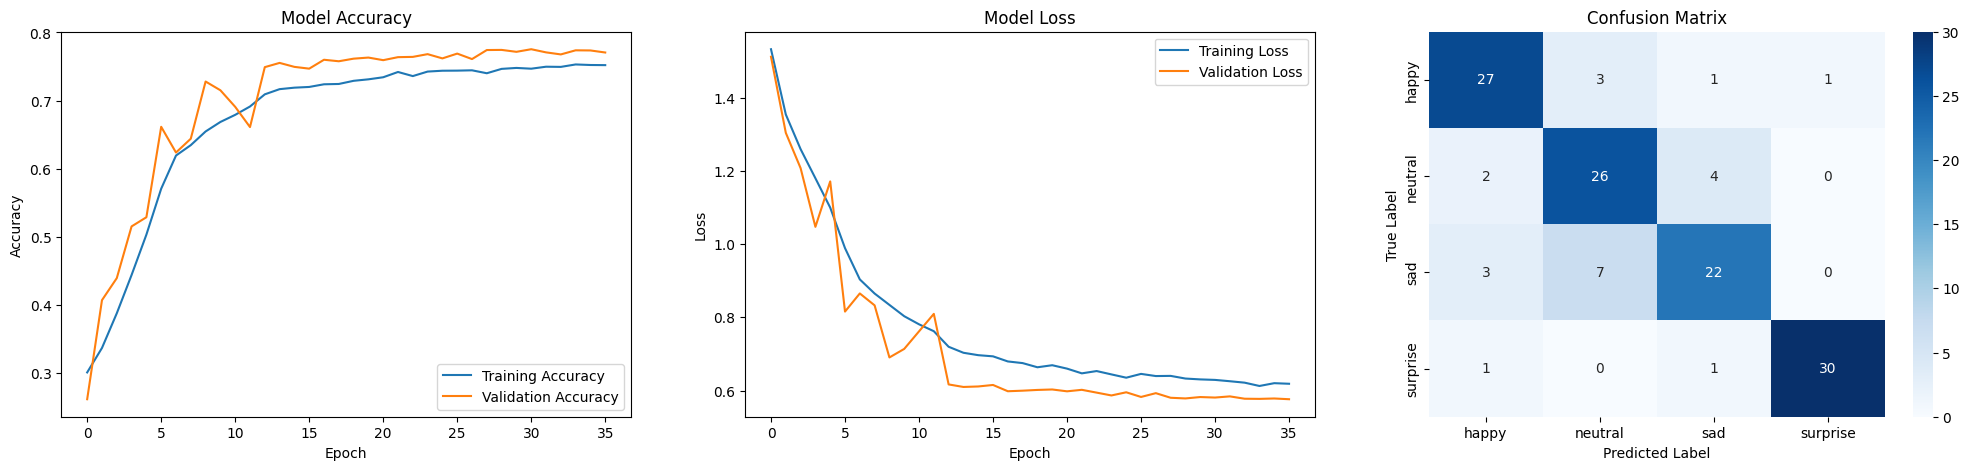

4/4 [==============================] - 0s 11ms/step - loss: 0.5187 - accuracy: 0.8203
Test Loss: 0.5187498927116394
Test Accuracy: 0.8203125




---
# VGG_16 MODEL PERFORMANCE

---



4/4 [==============================] - 0s 11ms/step
Confusion Matrix:
[[25  6  0  1]
 [ 0 28  3  1]
 [ 3  8 18  3]
 [ 0  2  2 28]]


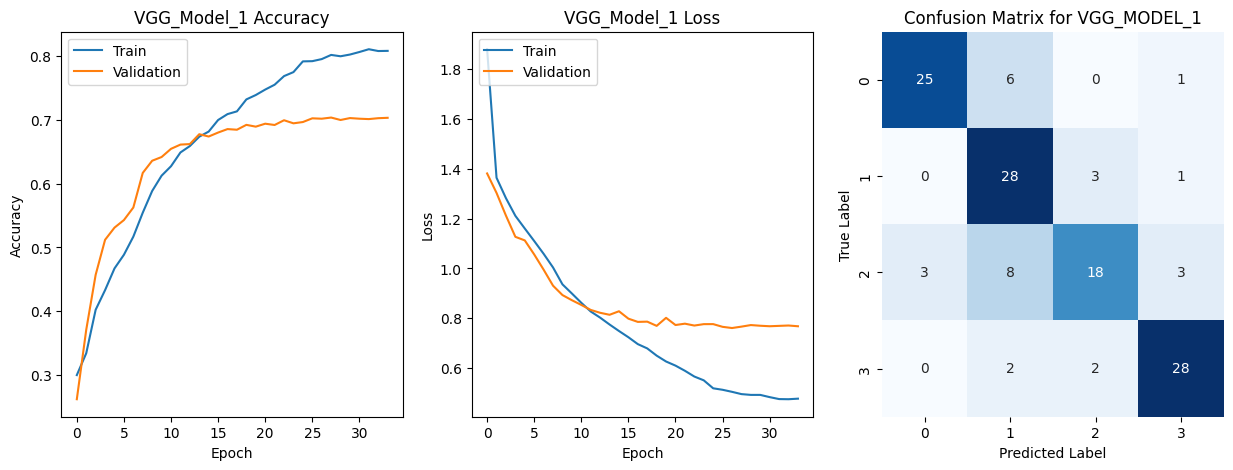

4/4 [==============================] - 0s 13ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.64      0.88      0.74        32
           2       0.78      0.56      0.65        32
           3       0.85      0.88      0.86        32

    accuracy                           0.77       128
   macro avg       0.79      0.77      0.77       128
weighted avg       0.79      0.77      0.77       128



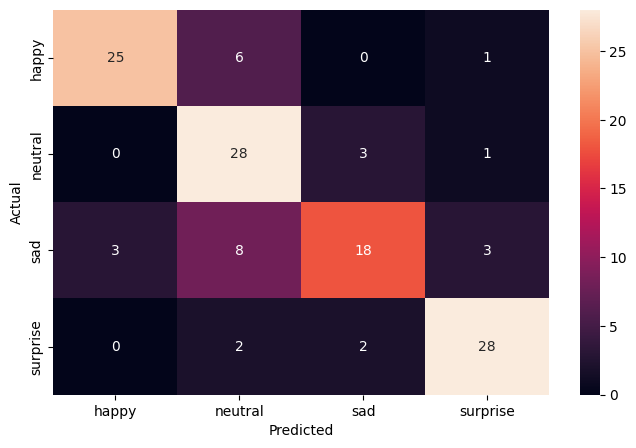



---
# RESNET MODEL PERFORMANCE
---





4/4 [==============================] - 1s 20ms/step
Confusion Matrix:
[[26  2  2  2]
 [ 2 25  5  0]
 [ 1 12 17  2]
 [ 0  3  1 28]]


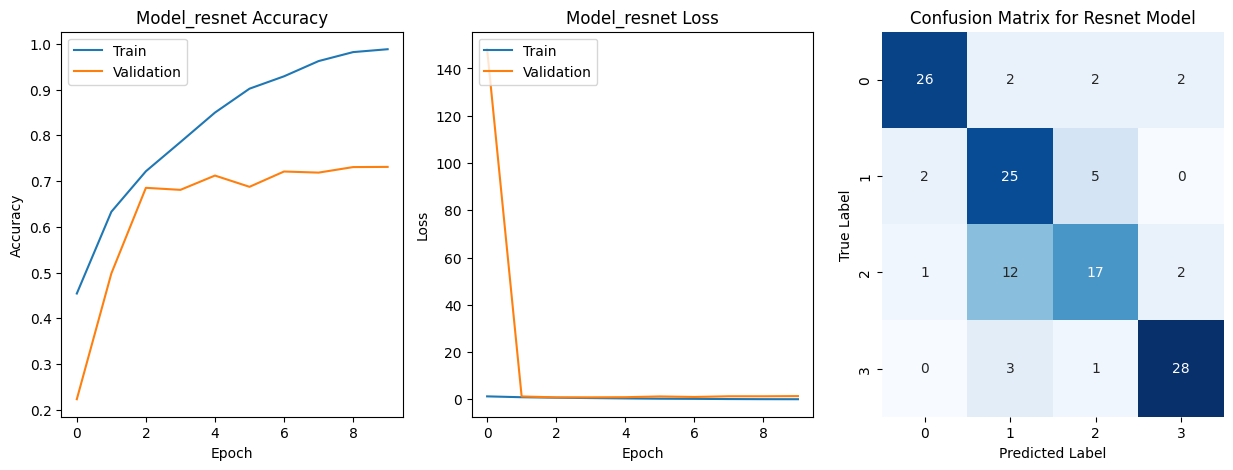

4/4 [==============================] - 0s 22ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.60      0.78      0.68        32
           2       0.68      0.53      0.60        32
           3       0.88      0.88      0.88        32

    accuracy                           0.75       128
   macro avg       0.76      0.75      0.75       128
weighted avg       0.76      0.75      0.75       128



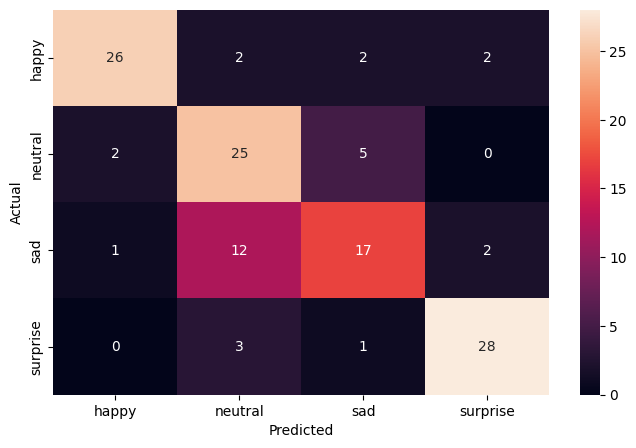



---
# EFFICIENT NET PERFORMANCE
---





4/4 [==============================] - 0s 12ms/step
Class names in the dataset: ['happy', 'neutral', 'sad', 'surprise']
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        32
           1       0.57      0.72      0.64        32
           2       0.54      0.44      0.48        32
           3       0.87      0.62      0.73        32

    accuracy                           0.65       128
   macro avg       0.66      0.65      0.65       128
weighted avg       0.66      0.65      0.65       128



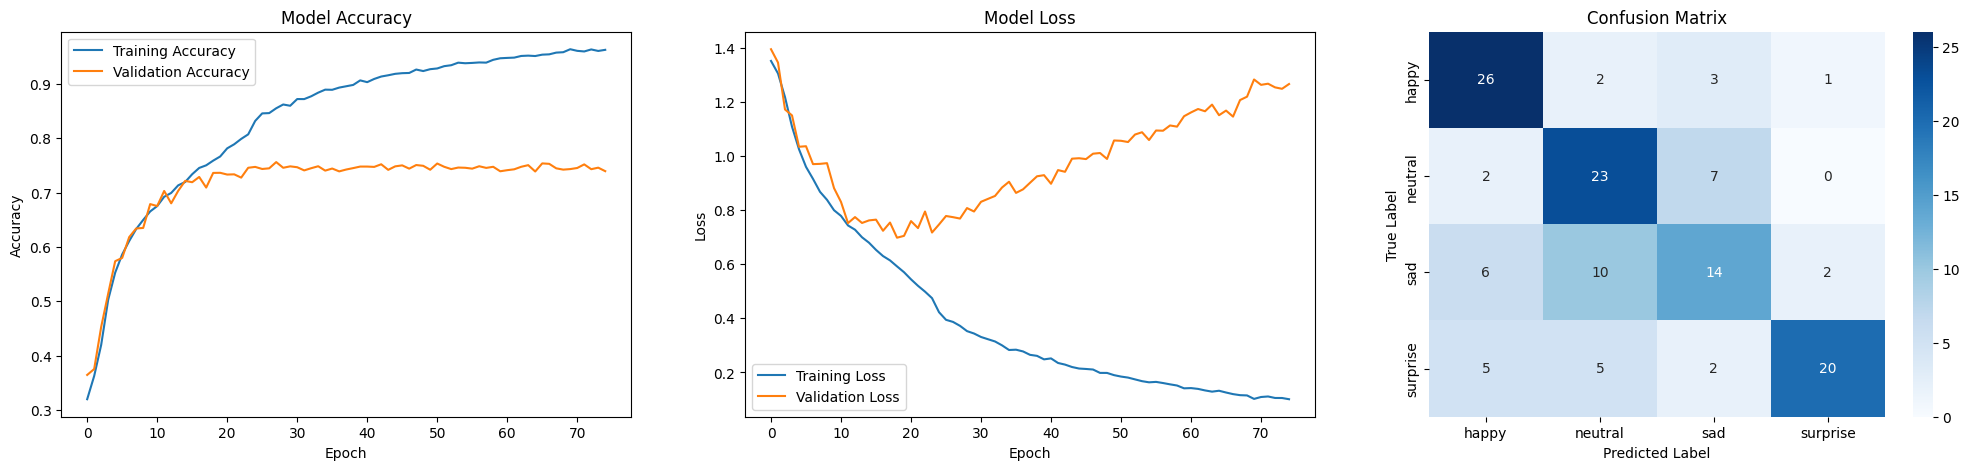

4/4 [==============================] - 0s 18ms/step - loss: 0.8464 - accuracy: 0.6484
Test Loss: 0.84635990858078
Test Accuracy: 0.6484375




---

# THIRD DEEP CONVOLUTIONAL NEURAL NETOWRK WITH 5 CNN BLOCKS: PERFORMANCE

---



4/4 [==============================] - 0s 17ms/step
Class names in the dataset: ['happy', 'neutral', 'sad', 'surprise']
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.65      0.75      0.70        32
           2       0.70      0.66      0.68        32
           3       0.84      0.84      0.84        32

    accuracy                           0.76       128
   macro avg       0.76      0.76      0.76       128
weighted avg       0.76      0.76      0.76       128



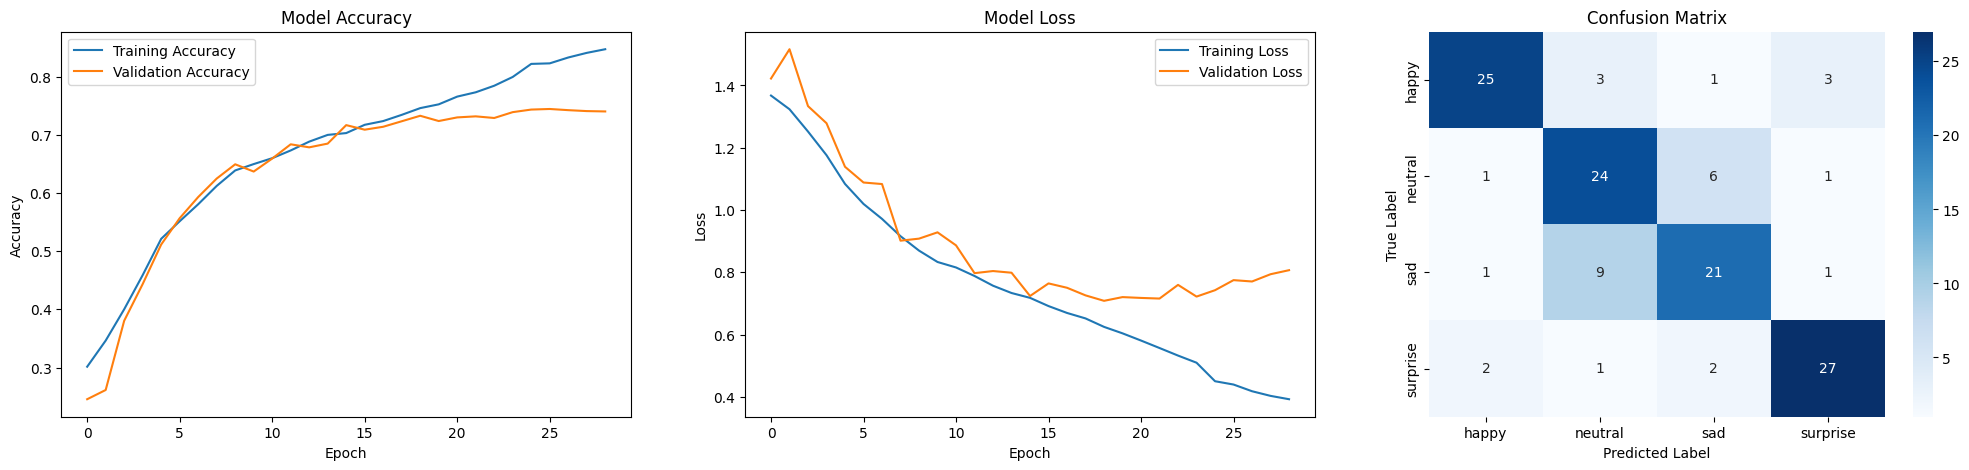

4/4 [==============================] - 0s 20ms/step - loss: 0.6133 - accuracy: 0.7578
Test Loss: 0.6132991909980774
Test Accuracy: 0.7578125




---

# FINAL EXPERIMENTAL SIAMESE NETWORK PERFORMANCE

---



4/4 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.69      0.75      0.72        32
           2       0.72      0.66      0.69        32
           3       0.97      0.88      0.92        32

    accuracy                           0.80       128
   macro avg       0.80      0.80      0.80       128
weighted avg       0.80      0.80      0.80       128



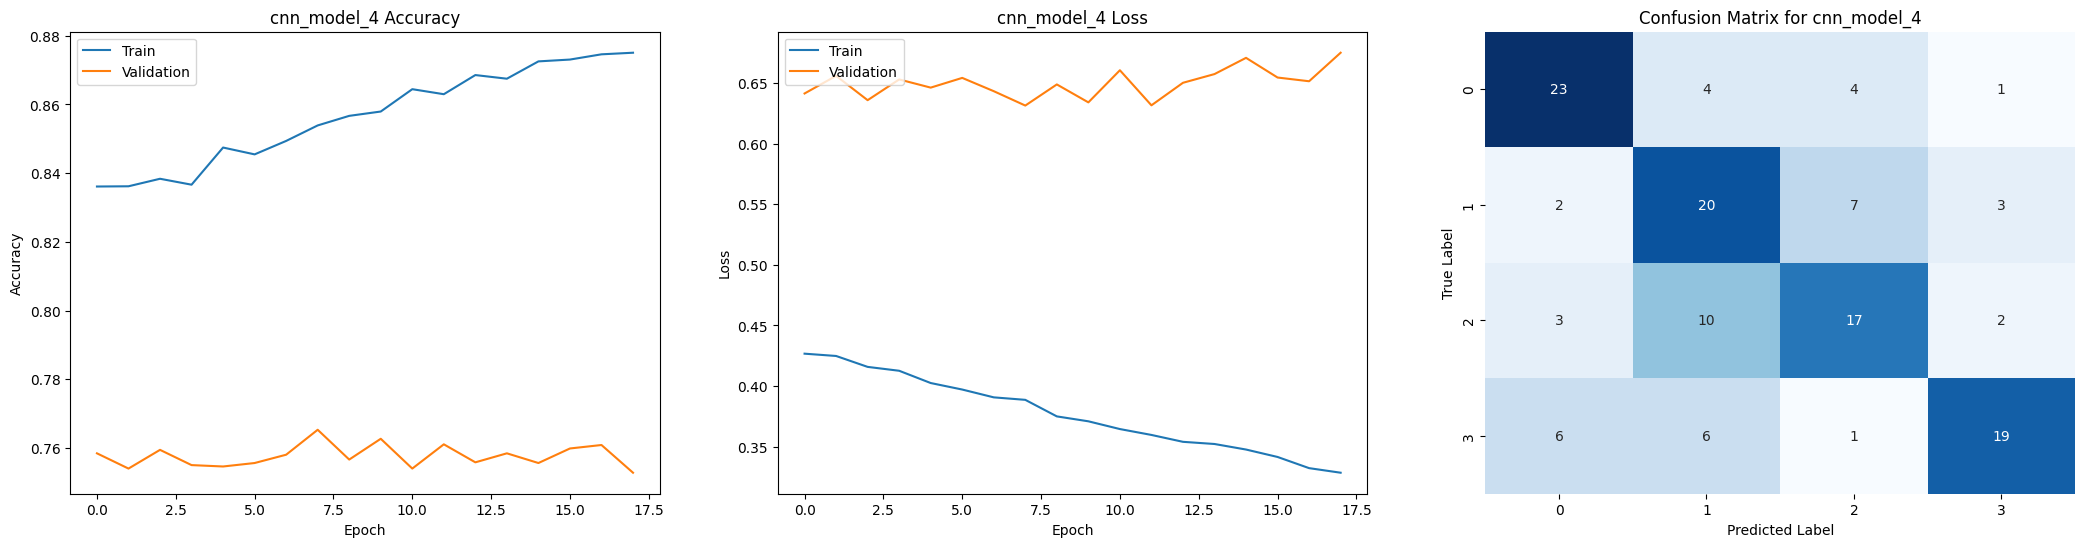

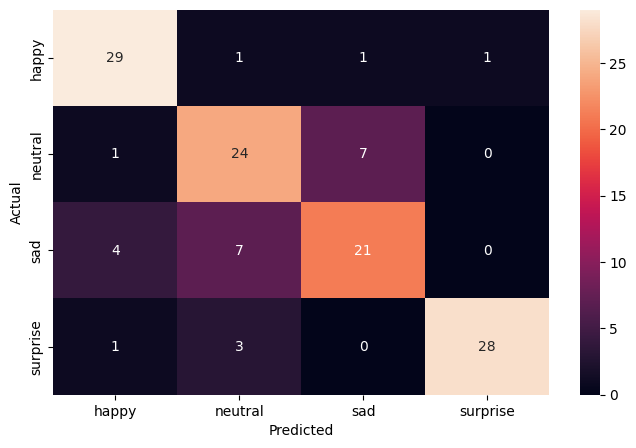

In [ ]:
!tensorflowjs_converter --input_format=keras /content/cnn_model_4.h5 /content/siamese_model_1


2024-02-22 05:12:35.043733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 05:12:35.043782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 05:12:35.044911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 05:12:36.086643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [241]:
# prompt: using the nbconvert tool convert the notebook to html

!jupyter nbconvert --to html "/content/cnn_model_4.ipynb"


[NbConvertApp] WARNING | pattern '/content/notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execu